In [ ]:
import IPython

In [ ]:
html_code = \
'''
<div style="color:white;background-color:#e90045;padding:3%;border-radius:150px 150px;font-size:2em;text-align:center"> <font color="White" size=+3 face="Lucida Calligraphy"><div style="align:center: justify">Electrical Faults Detection and Classsification</font></div>
'''
display(IPython.display.HTML(html_code))


<center> <img src="https://lge-ku.com/sites/default/files/2021-03/Transmission_Falling_Tree_033021a.gif" width="400" height="300"> </center>


The transmission line is the most crucial part of the power system. The requirement of power and its allegiance has grown up exponentially over the modern era, and the prominent role of a transmission line is to transmit electric power from the source area to the distribution network. The electrical power system consists of so many complex dynamic and interacting elements that are always prone to disturbance or an electrical fault.
> The power system consists of 4 generators of $11 × 10^3 V$, each pair located at each end of the transmission line. Transformers are present in between to simulate and study the various faults at the midpoint of the transmission line.

>**What are Electrical Faults?**

*Normally, a power system operates under balanced conditions. When the system becomes unbalanced due to the failures of insulation at any point or due to the contact of live wires, a short–circuit or fault, is said to occur in the line. Faults may occur in the power system due to the number of reasons like natural disturbances (lightning, high-speed winds, earthquakes), insulation breakdown, falling of a tree, bird shorting, etc.*

>Faults can be brodly categorised into two types:

1. Open-circuit Fault

2. Short-Circuit Faults

**Short-Circuit Faults**
1. Symmetrical

2. Asymmetrical Faults


>Symmetrical and Asymmetrical Faults

- In symmetrical faults, all phases are shorted to each other or to earth (L-L-L) or (L-L-L-G).
- The nature of this type of fault is balanced.
- In this type of fault,fault currents in all phases are symmetrical i.e. their magnitudes are equal and they are equally displaced by angle 120 degree.
- It is more severe type of fault but it occurs rarely.

>Asymmetrical Faults

- These faults involve only one or two phases.
In this type of fault, three phase lines become unbalanced.
- There are mainly three types namely line to ground (L-G), line to line (L-L) and double line to ground (LL-G) faults.
- These type of faults mostly occur on power system..

<center> <img src="https://ars.els-cdn.com/content/image/1-s2.0-S2314717217300065-gr1.jpg" width="600" height="200"> </center>

>About this dataset file

This file contains the dataset to classify the types of fault.

- Inputs - [Ia,Ib,Ic,Va,Vb,Vc]
  - Ia = Current in line A
  - Ib = Current in line B

  - Ic = Current in line C

  - Va = Voltage in line A

  - Vb = Voltage in line B

  * Vc = Voltage in line C

>Examples :

- [G C B A] - Outputs

- [0 0 0 0] - No Fault

- [1 0 0 0] - Ground Fault
- [0 0 0 1] - Fault in Line A
- [0 0 1 0] - Fault in Line B
- [0 1 0 0] - Fault in Line C
- [1 0 0 1] - LG fault (Between Phase A and Ground)
- [1 0 1 0] - LG fault (Between Phase B and Ground)
- [1 1 0 0] - LG fault (Between Phase C and Ground)
- [0 0 1 1] - LL fault (Between Phase B and Phase A)
- [0 1 1 0] - LL fault (Between Phase C and Phase B)
- [0 1 0 1] - LL fault (Between Phase C and Phase A)
- [1 1 0 0] - LG fault (Between Phase C and Ground)
- [1 0 1 0] - LG fault (Between Phase B and Ground)
- [1 0 0 1] - LG fault (Between Phase A and Ground)
- [1 0 1 1] - LLG Fault (Between Phases A,B and Ground)
- [1 1 0 1] - LLG Fault (Between Phases A,C and Ground)
- [1 1 1 0] - LLG Fault (Between Phases C,B and Ground)
- [0 1 1 1] - LLL Fault(Between all three phases)
-[1 1 1 1] - LLLG fault( Three phase symmetrical fault)

## Objectives of the Hands-on session

1. Dataset exploration using various types of data visualization.
2. Build various Machine Learning models that can predict the Fault type in transmission Line.




In [ ]:
## Import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set_theme(context='notebook',
              style='white',
              palette='deep',
              font='Lucida Calligraphy',
              font_scale=1.5,
              color_codes=True,
              rc=None)
import matplotlib

plt.rcParams['figure.figsize'] = (14,8) 
plt.rcParams['figure.facecolor'] = '#F0F8FF'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.edgecolor'] = 'green'
plt.rcParams['figure.frameon'] = True

plt.rcParams["figure.autolayout"] = True

plt.rcParams['axes.facecolor'] = '#F5F5DC'
plt.rcParams['axes.titlesize'] = 25   
plt.rcParams["axes.titleweight"] = 'normal'
plt.rcParams["axes.titlecolor"] = 'Olive'
plt.rcParams['axes.edgecolor'] = 'pink'
plt.rcParams["axes.linewidth"] = 2
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.titlelocation'] = 'center' 
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.labelpad"] = 2
plt.rcParams['axes.labelweight'] = 1
plt.rcParams["axes.labelcolor"] = 'Olive'
plt.rcParams["axes.axisbelow"] = False 
plt.rcParams['axes.xmargin'] = .2
plt.rcParams["axes.ymargin"] = .2

plt.rcParams["xtick.bottom"] = True 
plt.rcParams['xtick.color'] = '#A52A2A'
plt.rcParams["ytick.left"] = True  
plt.rcParams['ytick.color'] = '#A52A2A'
plt.rcParams['axes.grid'] = True 
plt.rcParams['grid.color'] = 'green'
plt.rcParams['grid.linestyle'] = '--' 
plt.rcParams['grid.linewidth'] = .5
plt.rcParams['grid.alpha'] = .3       

plt.rcParams['legend.loc'] = 'best' 
plt.rcParams['legend.facecolor'] =  'NavajoWhite'  
plt.rcParams['legend.edgecolor'] = 'pink'
plt.rcParams['legend.shadow'] = True
plt.rcParams['legend.fontsize'] = 20


plt.rcParams['font.family'] = 'Lucida Calligraphy'
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.edgecolor'] = 'Blue'

In [ ]:
#df_class = pd.read_csv("/content/drive/MyDrive/Python_for_Engineers/mycsvfile.csv")
df_class=pd.read_csv("https://raw.githubusercontent.com/sijuswamy/B-Data-Analytics-Workshop-/main/mycsvfile.csv")
df_class.sample(5).style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

$V_{p.u.} = \frac{V}{V_{base}} $

In actual, the power system consists of 4 generators of $11 × 10^3 V$. so we can convert by multiplying them by $11000$ Volts provided they have taken 11k as their base.

In [ ]:
## getting information about the dataset

df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [ ]:
# checking for null
df_class.isnull().sum().sum()

0

In [ ]:
# dimension 

df_class.shape

(7861, 10)

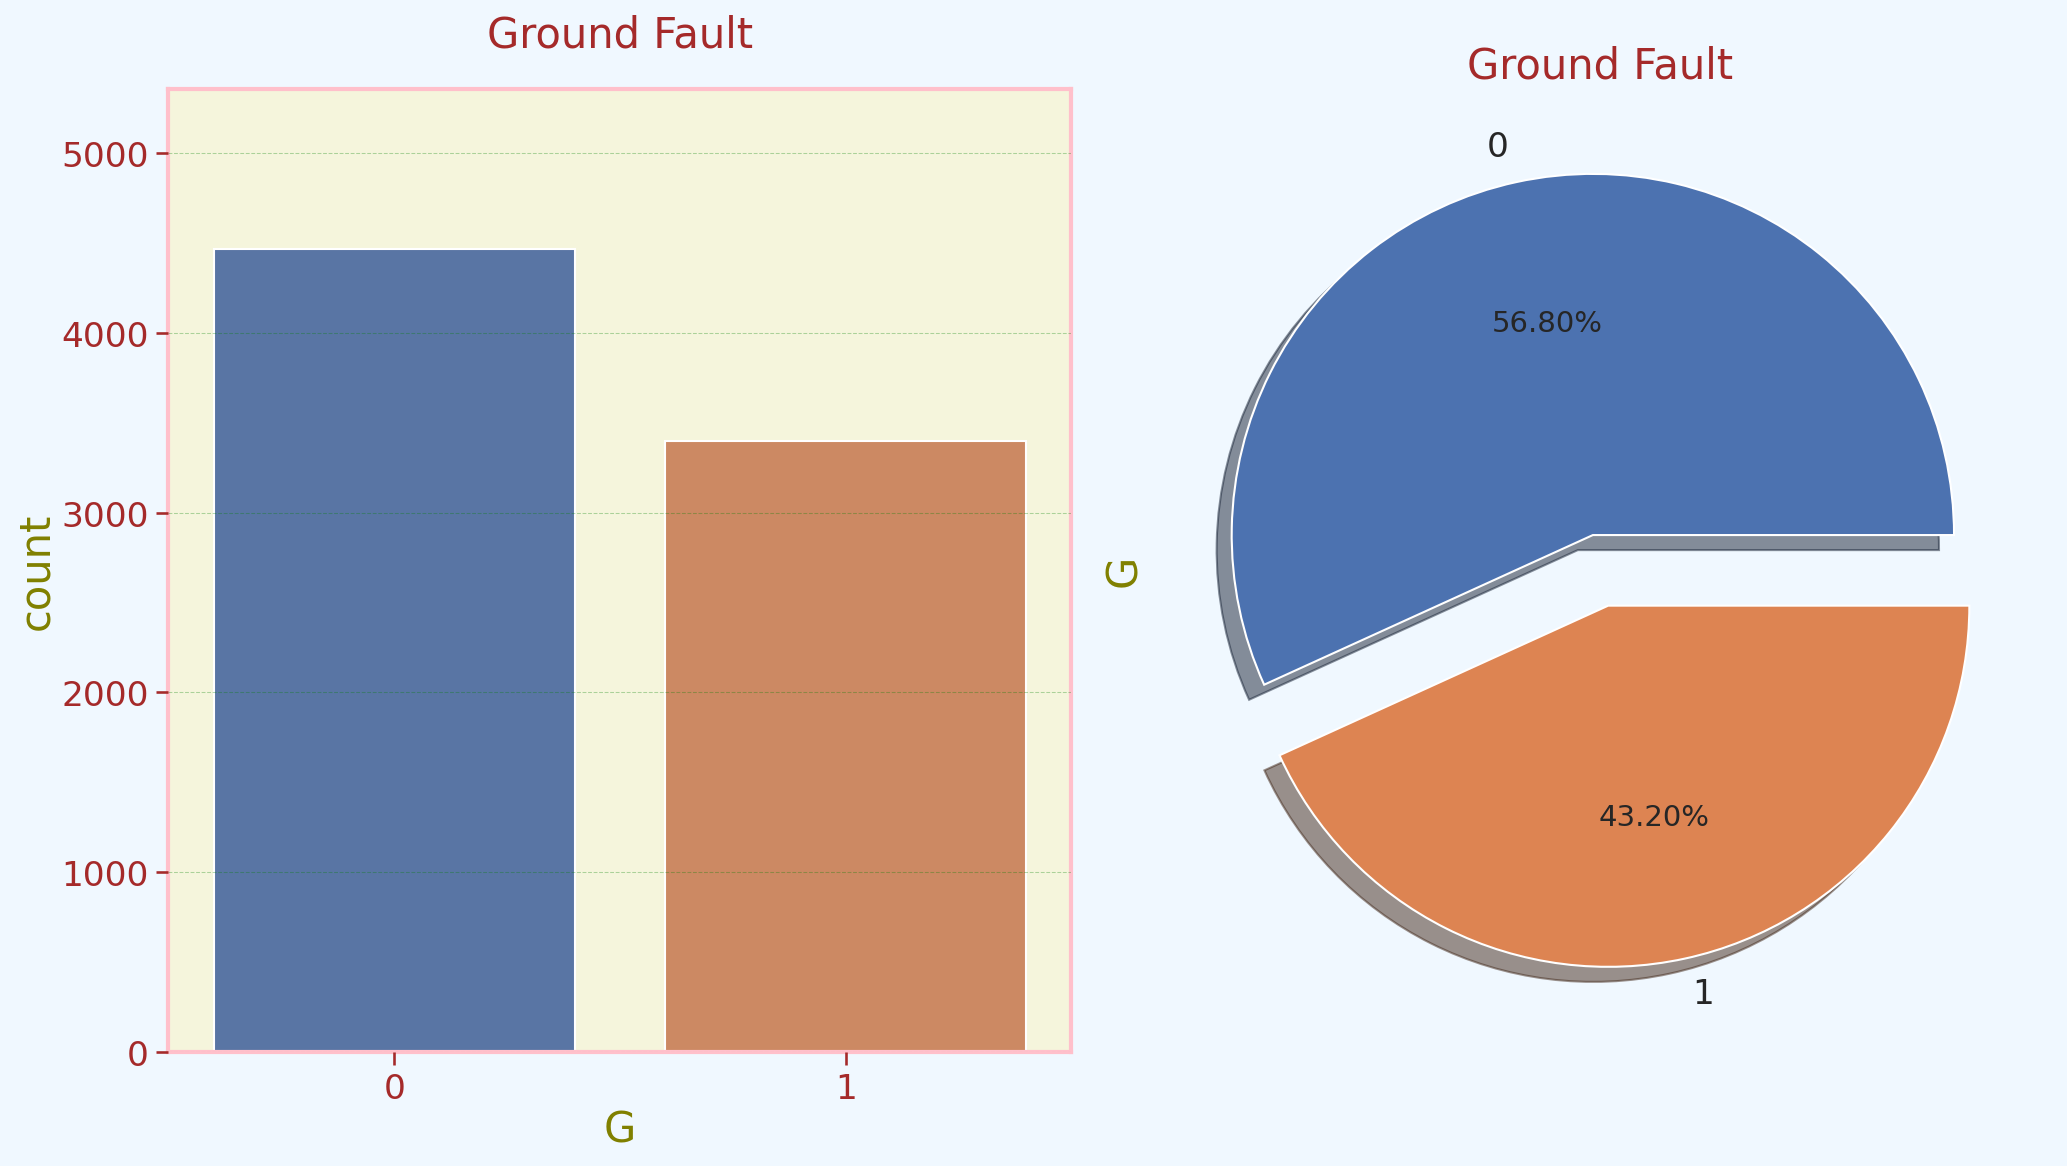

In [ ]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='G', data=df_class)
#ax.bar_label(ax.containers[0])
plt.title("Ground Fault", fontsize=20,color = 'Brown',pad=20)
ax =plt.subplot(1,2,2)
ax=df_class['G'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Ground Fault", fontsize = 20,color='Brown',pad=20);

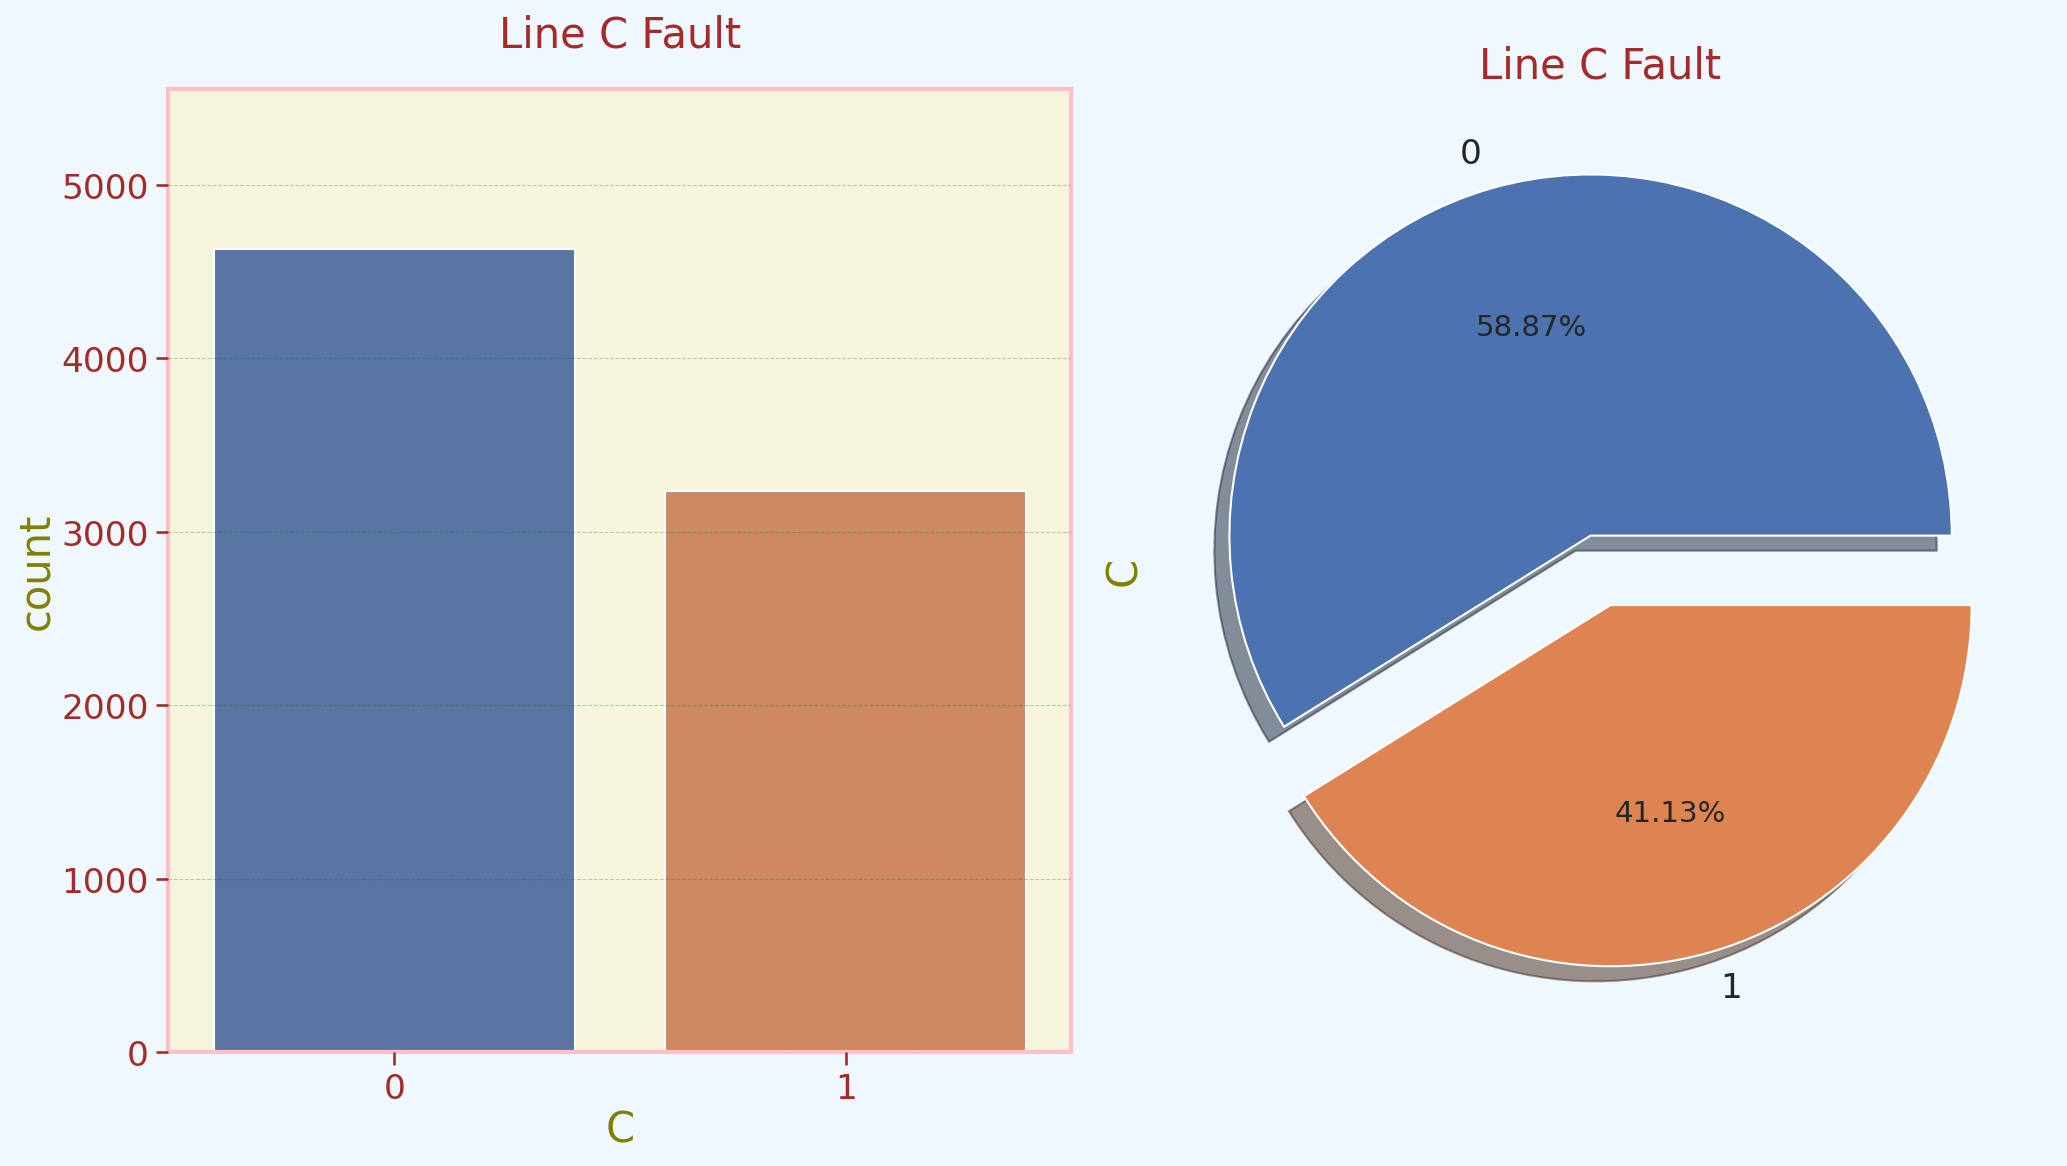

In [ ]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='C', data=df_class)
#ax.bar_label(ax.containers[0])
plt.title("Line C Fault", fontsize=20,color = 'Brown',pad=20)

ax =plt.subplot(1,2,2)
ax=df_class['C'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Line C Fault", fontsize = 20,color='Brown',pad=20);

In [ ]:
# Combing all fault together in one Fault_Type
df_class['Fault_Type'] = df_class['G'].astype('str') + df_class['C'].astype('str') + df_class['B'].astype('str') + df_class['A'].astype('str')
df_class.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})


## Giving the proper name to the fault according to the data description provided above

In [ ]:
df_class['Fault_Type'][df_class['Fault_Type'] == '0000' ] = 'NO Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '1011' ] = 'Line A Line B to Ground Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '0111' ] = 'Line A Line B Line C'
df_class['Fault_Type'][df_class['Fault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'

In [ ]:
df_class.sample(10).style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

In [ ]:
df_class.describe().style.background_gradient(cmap='rainbow').set_precision(3)


In [ ]:
df_class['Fault_Type'].value_counts(ascending=False)

NO Fault                                2365
Line A Line B to Ground Fault           1134
Line A Line B Line C to Ground Fault    1133
Line A to Ground Fault                  1129
Line A Line B Line C                    1096
Line B to Line C Fault                  1004
Name: Fault_Type, dtype: int64

## Number of faults in the system according to their Fault_Type

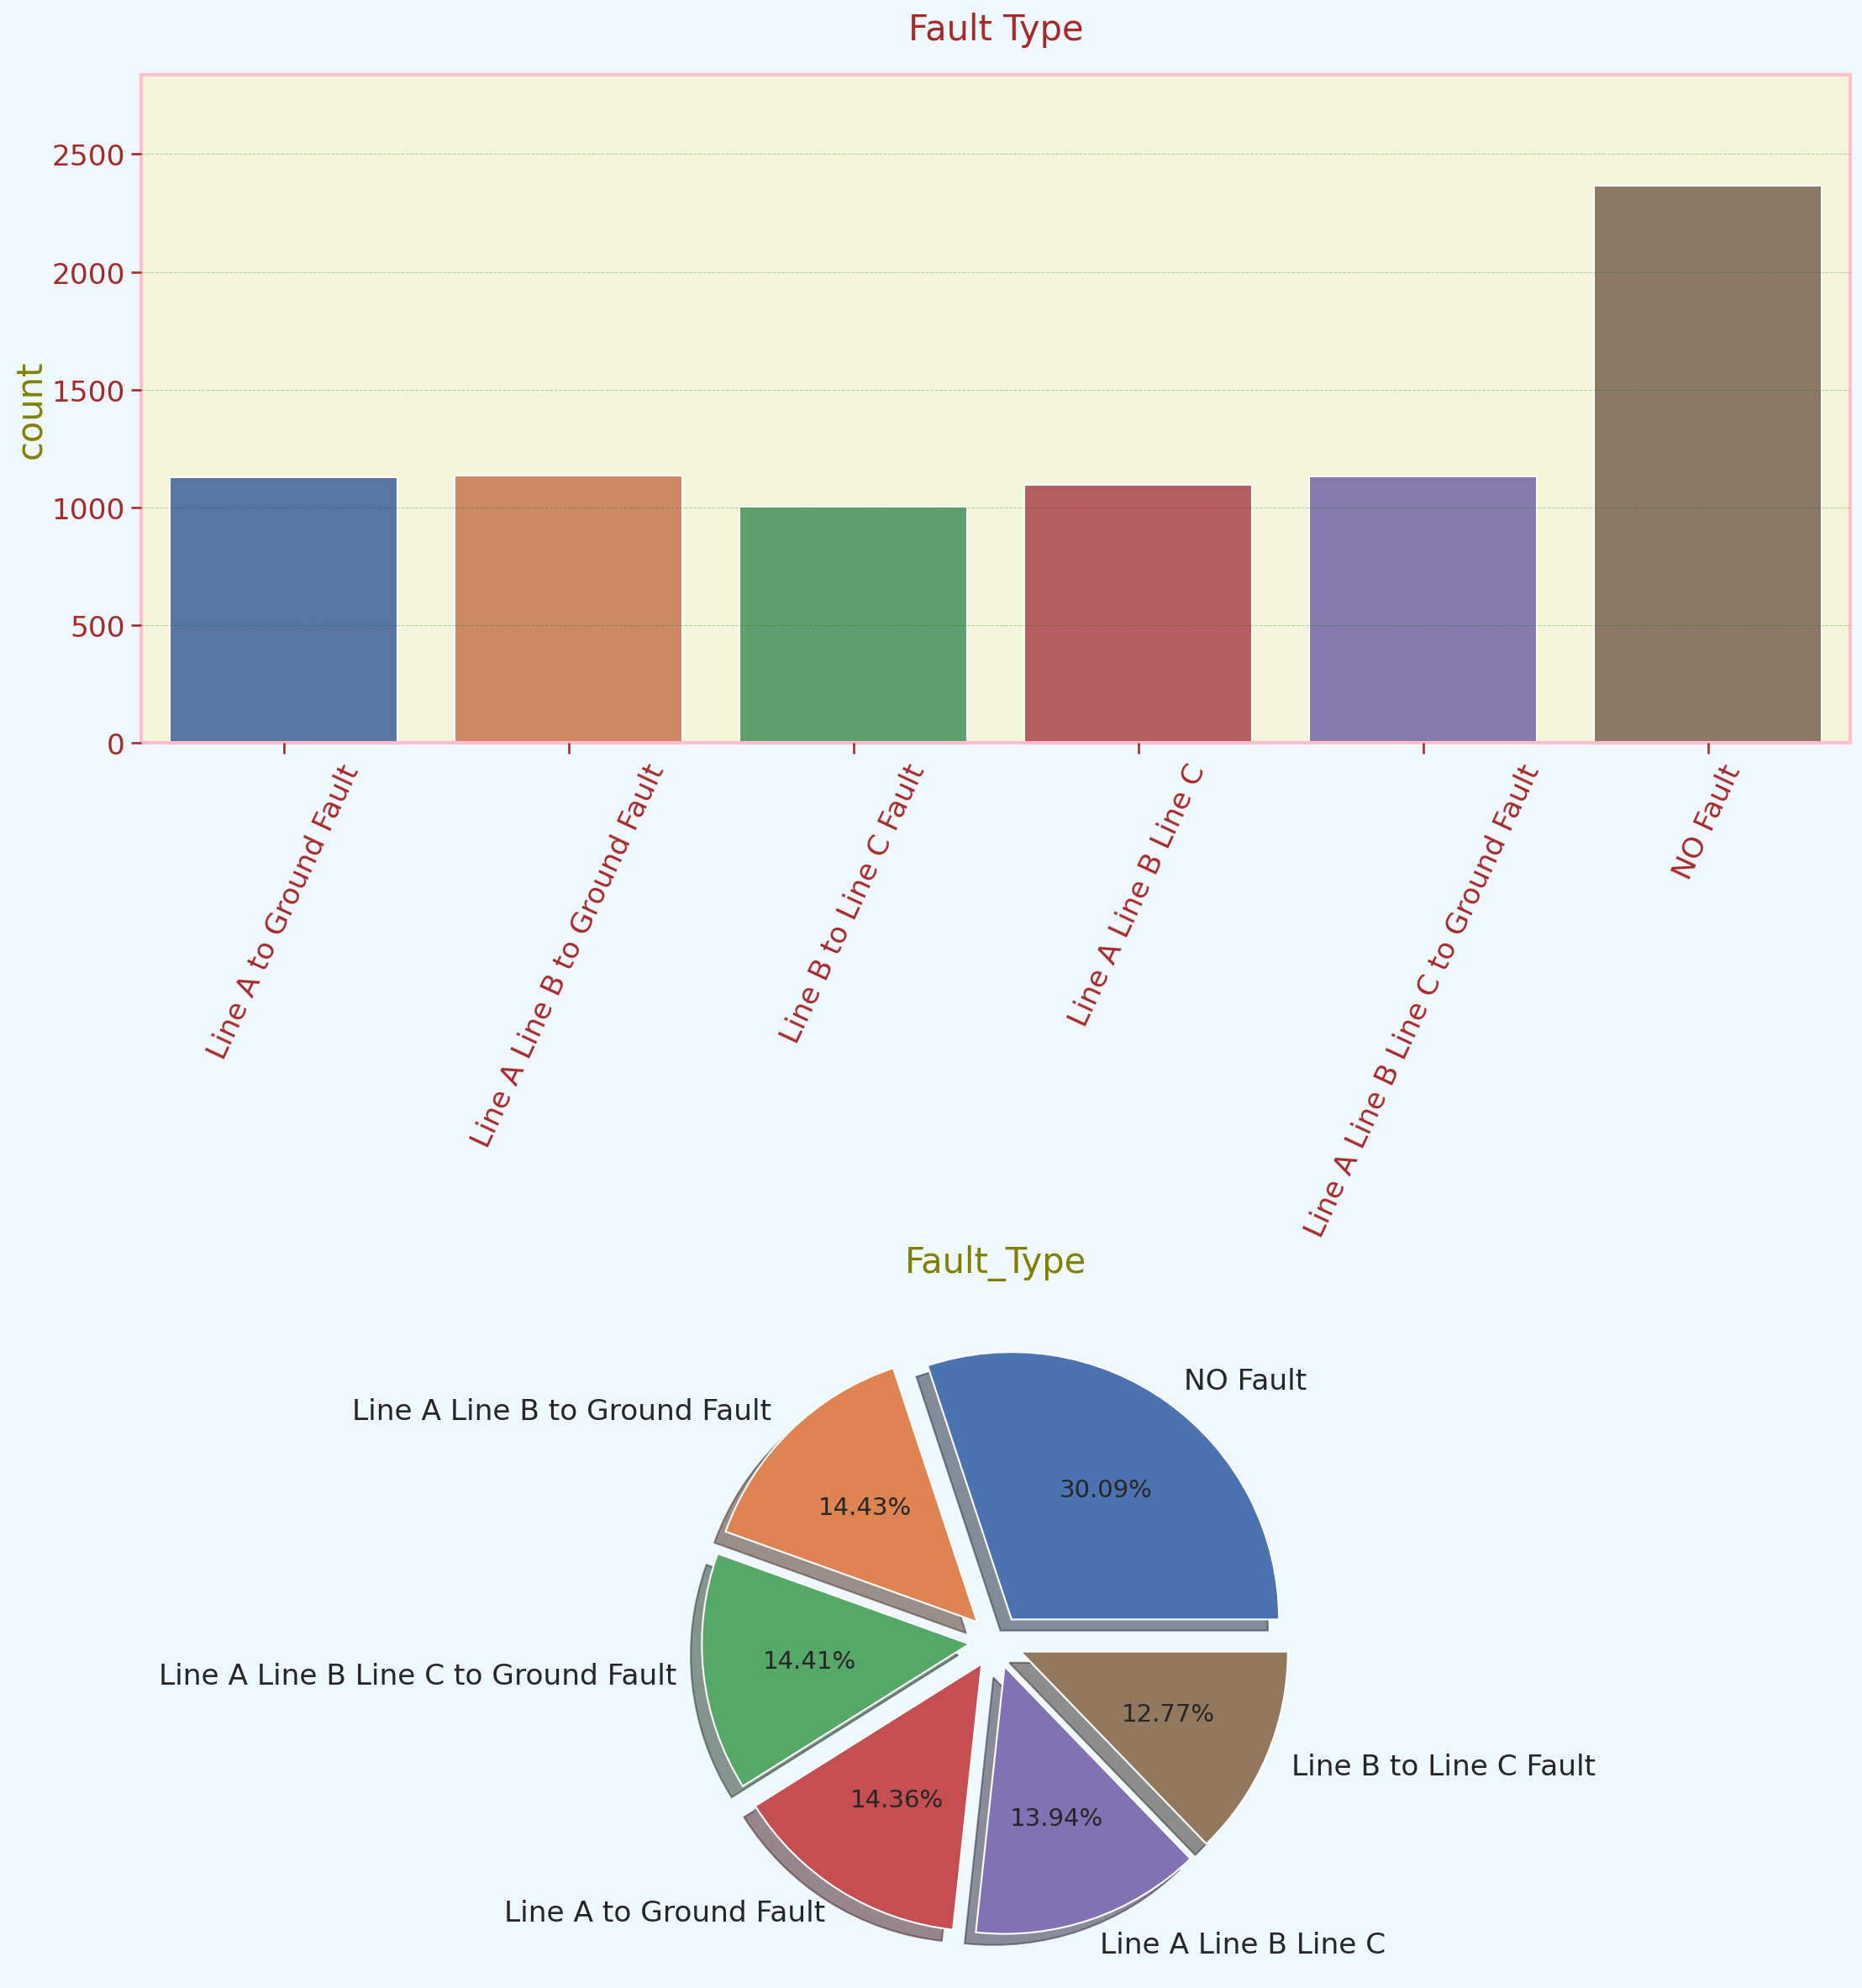

In [ ]:
ax = plt.figure(figsize = (15,16))
ax = plt.subplot(2,1,1)
ax = sns.countplot(x='Fault_Type', data=df_class)
#ax.bar_label(ax.containers[0])
plt.title("Fault Type", fontsize=20,color = 'Brown',pad=20)
plt.xticks(rotation=65)
plt.tight_layout()

ax =plt.subplot(2,1,2)
ax=df_class['Fault_Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
plt.tight_layout()
plt.axis('off');

<center> <img src="https://4.bp.blogspot.com/-uVv83087Yow/WkyGq2knzCI/AAAAAAAAEP4/cOHQ87sGhyQeR79lVyJRovAF4HEeT6bQACLcBGAs/s1600/world-find-share-on-giphy.gif.gif" width="1000" height="200"> 
</center>

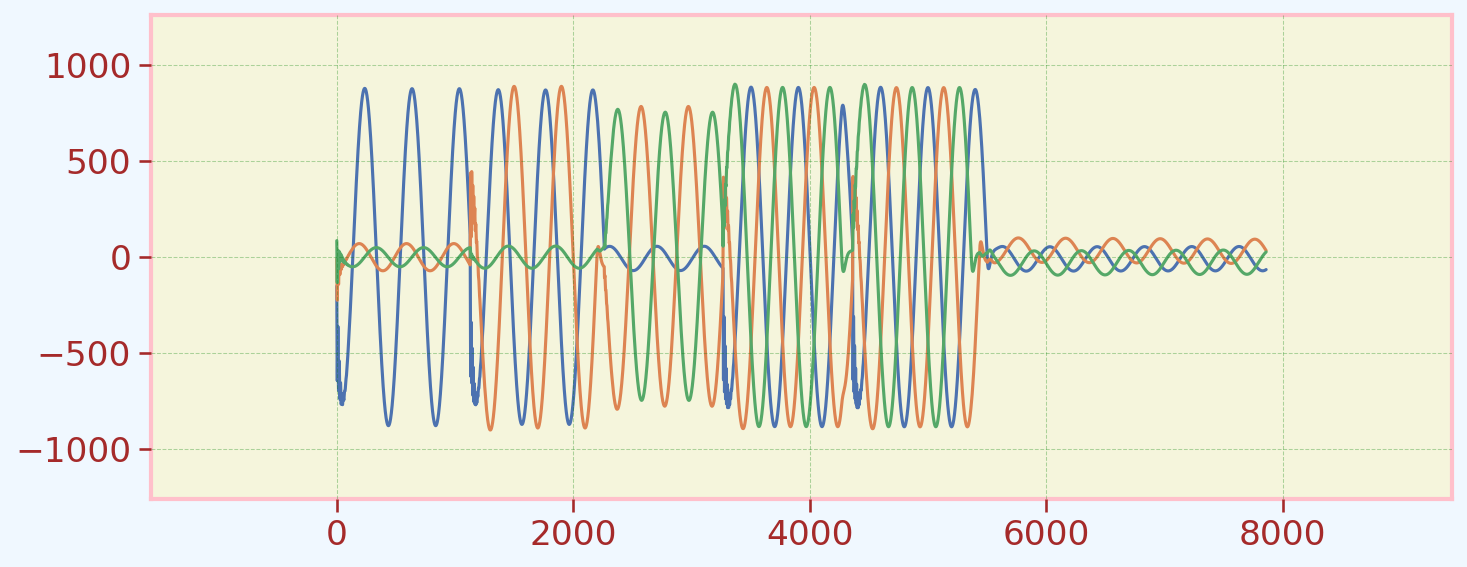

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(df_class["Ia"])
plt.plot(df_class["Ib"])
plt.plot(df_class["Ic"]);

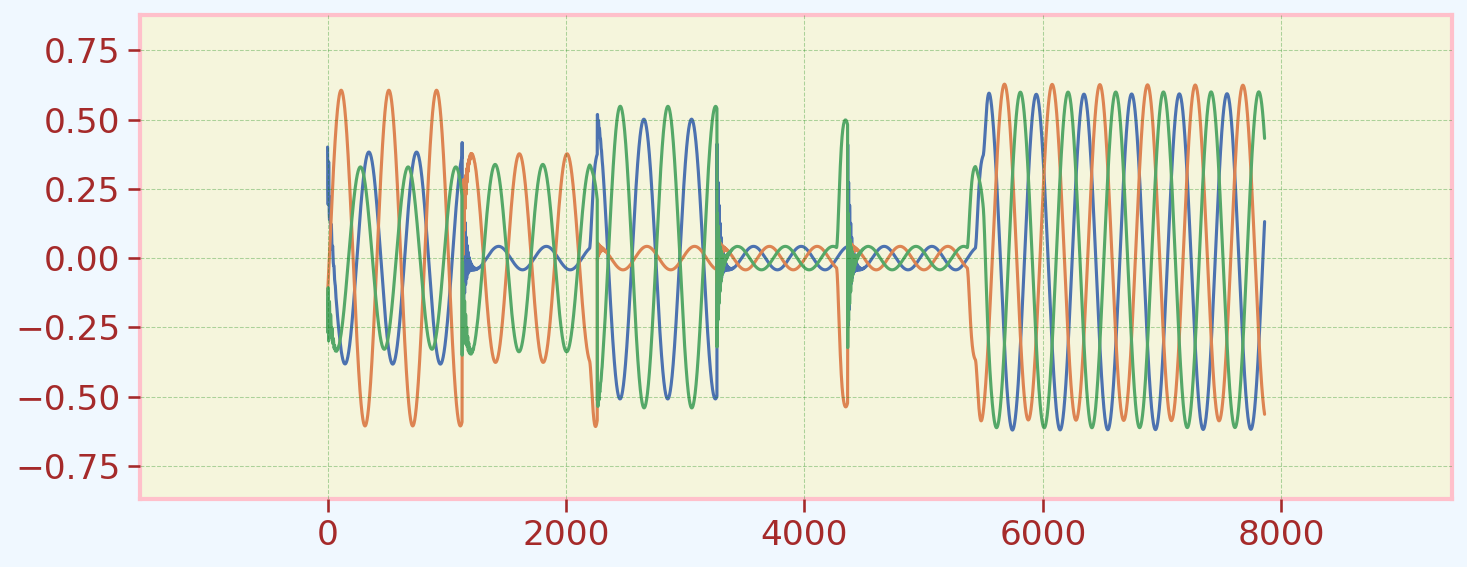

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(df_class["Va"])
plt.plot(df_class["Vb"])
plt.plot(df_class["Vc"]);

>Voltage or Current graph, where there is large fluctuation in the graph, there faults have occurred

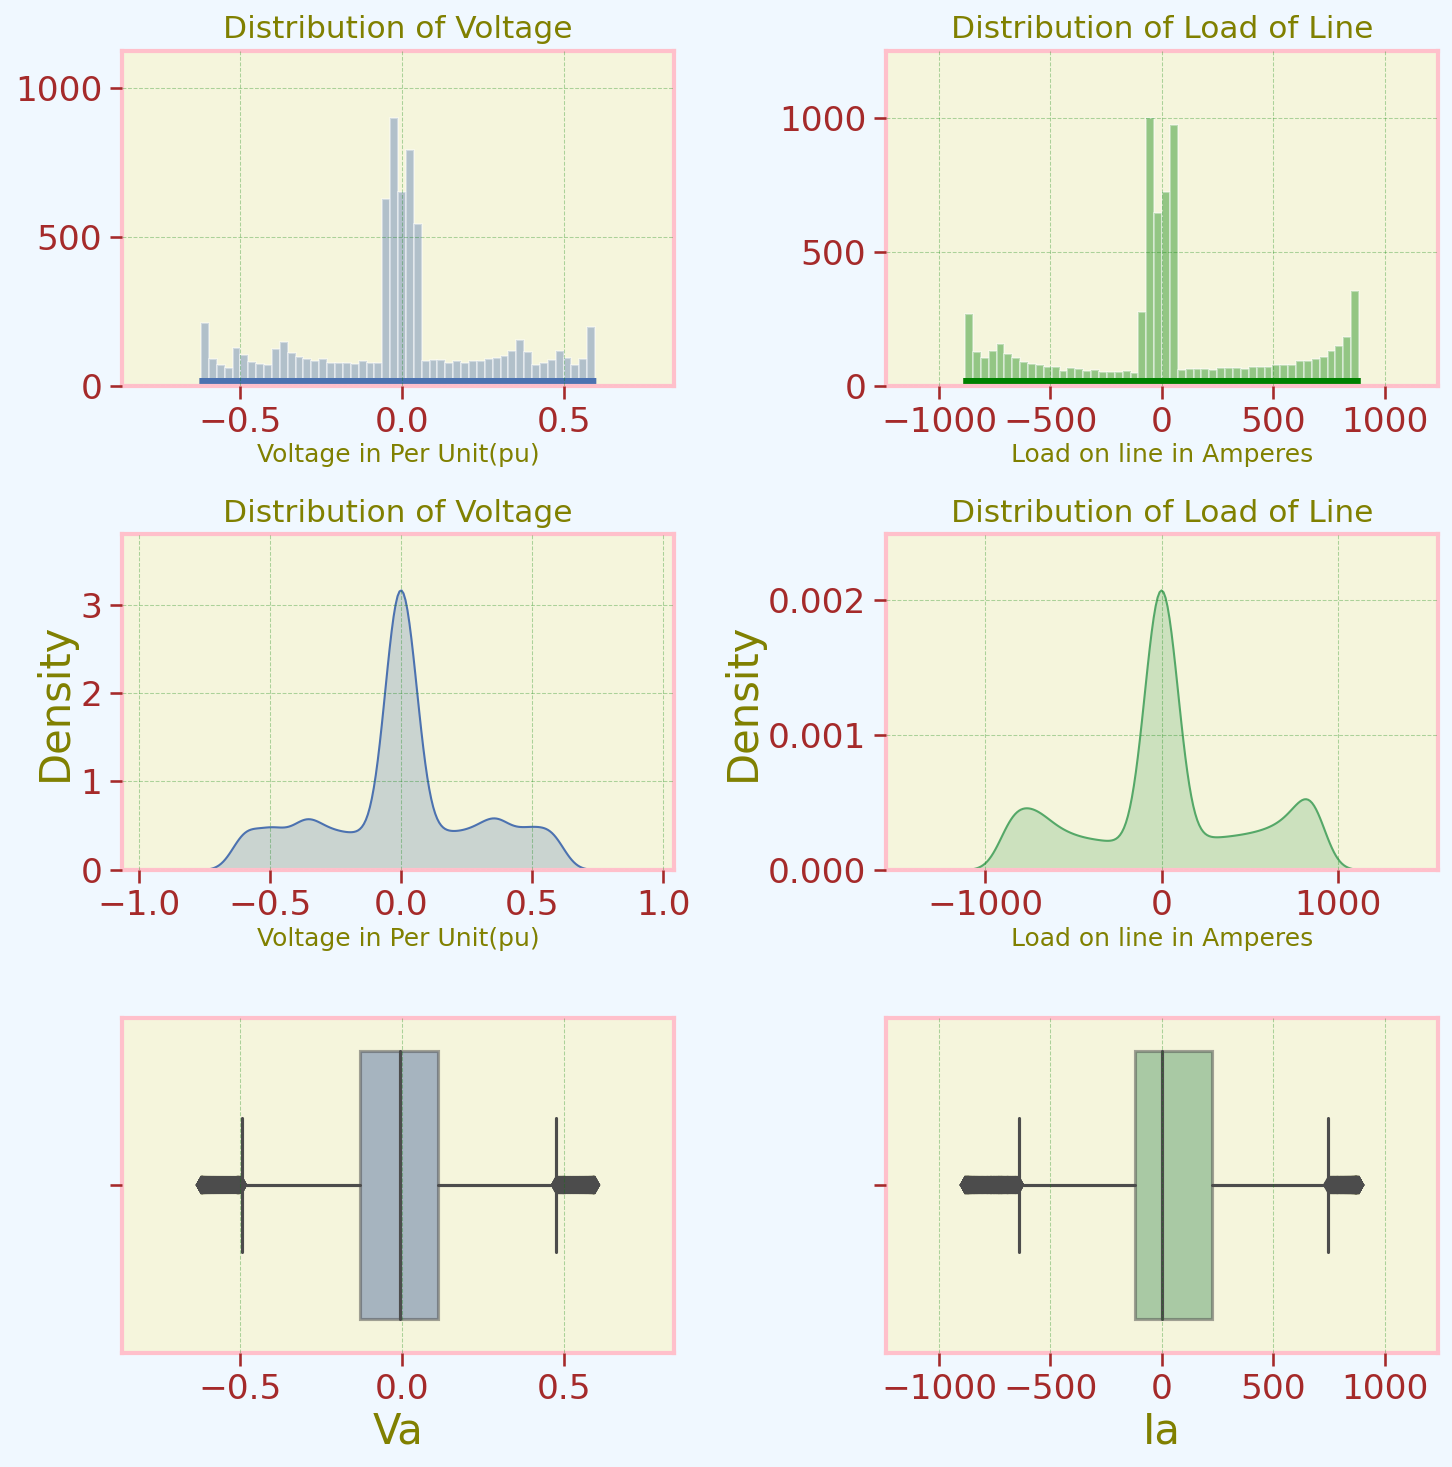

In [ ]:
plt.figure(figsize= (15,10))
#plt.suptitle("Distributions of Different Features", fontsize = 20)
#Histograms
plt.subplot(3,3,1)
sns.distplot(df_class['Va'], rug = True, kde = False)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,2)
sns.distplot(df_class['Ia'], color= 'green',rug = True, kde = False)
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)
#Kde Plots
plt.subplot(3,3,4)
sns.kdeplot(df_class['Va'], shade = True)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,5)
sns.kdeplot(df_class['Ia'], shade = True, color = 'g')
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Box Plots
plt.subplot(3,3,7)
sns.boxplot(x = df_class['Va'], orient = 'v',color= 'b', boxprops=dict(alpha=.5))
plt.subplot(3,3,8)
sns.boxplot(x = df_class['Ia'], orient = 'v', color= 'g', boxprops=dict(alpha=.5))


plt.tight_layout()
plt.show()



# Separating Faults into different Categories

In [ ]:
No_Fault = df_class[df_class['Fault_Type'] == 'NO Fault' ]
No_Fault.sample(5).style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

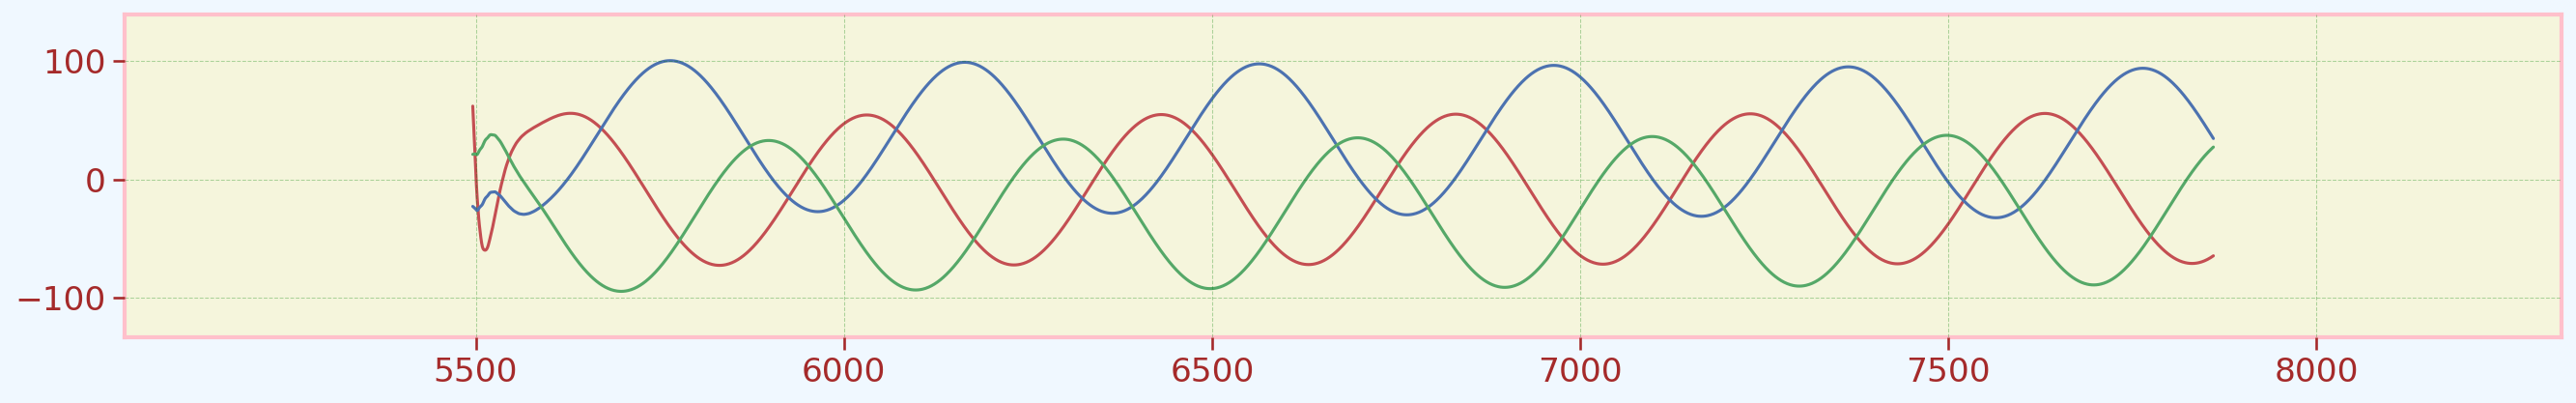

In [ ]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(No_Fault["Ia"],'r')
ax = plt.plot(No_Fault["Ib"],'b')
ax = plt.plot(No_Fault["Ic"],'g');

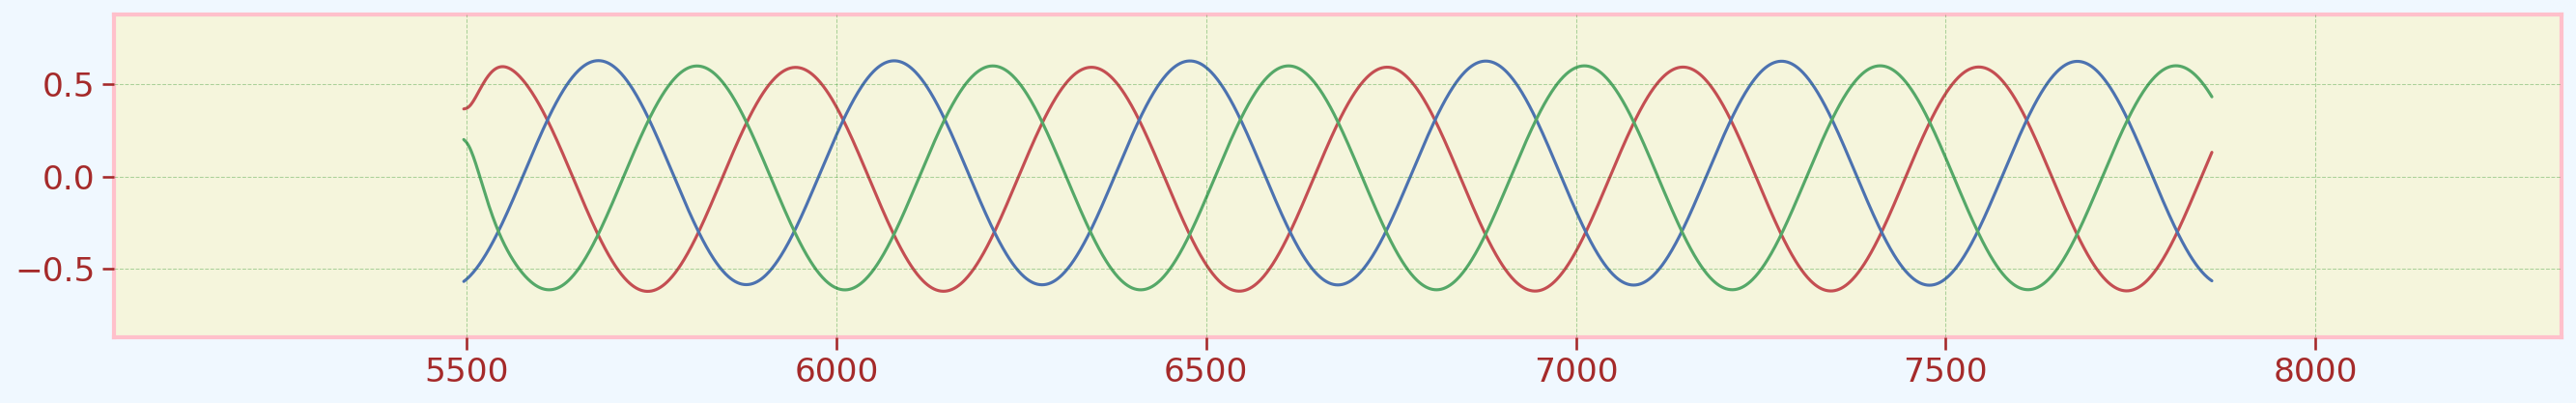

In [ ]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(No_Fault["Va"],'r')
ax = plt.plot(No_Fault["Vb"],'b')
ax = plt.plot(No_Fault["Vc"],'g');

>In a normal (No_Fault) condition Voltage or Current graph, is symmetrical and sinusoidal in nature with current and voltage 120 degree in phase shift and maximum current is approximately +100 to -100 Amperes and voltage +0.5 pu to -0.5pu

<center> <img src="https://circuitglobe.com/wp-content/uploads/2015/10/resistive-circuit-waveform-compressor2.jpg" width="600" height="200"> </center>

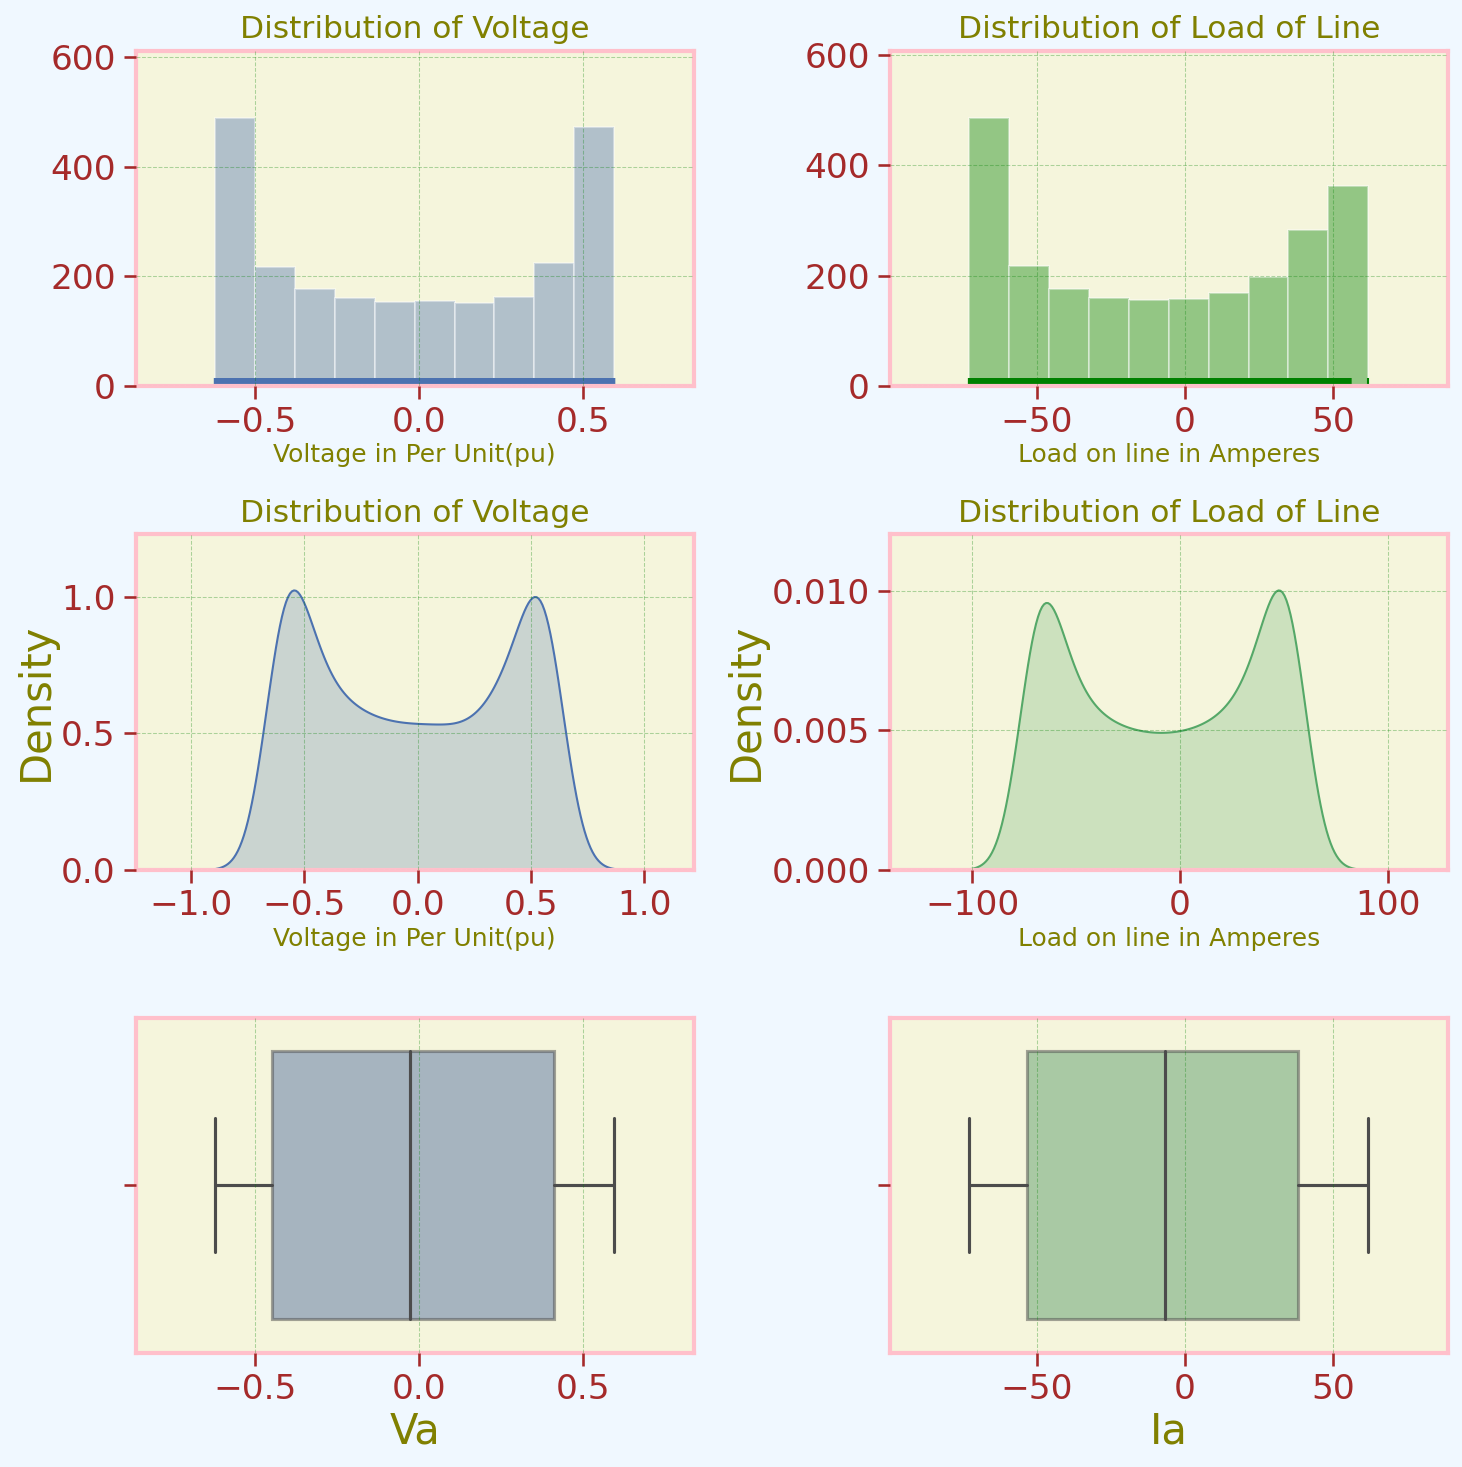

In [ ]:
plt.figure(figsize= (15,10))
#plt.suptitle("Distributions of Different Features", fontsize = 20)
#Histograms
plt.subplot(3,3,1)
sns.distplot(No_Fault['Va'], rug = True, kde = False)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,2)
sns.distplot(No_Fault['Ia'], color= 'green',rug = True, kde = False)
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)
#Kde Plots
plt.subplot(3,3,4)
sns.kdeplot(No_Fault['Va'], shade = True)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,5)
sns.kdeplot(No_Fault['Ia'], shade = True, color = 'g')
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)
#Box Plots
plt.subplot(3,3,7)
sns.boxplot(x = No_Fault['Va'], orient = 'v',color= 'b', boxprops=dict(alpha=.5))
plt.subplot(3,3,8)
sns.boxplot(x = No_Fault['Ia'], orient = 'v', color= 'g', boxprops=dict(alpha=.5))


plt.tight_layout()
plt.show()

## 2. Faulty System with Line A to Ground Fault

In [ ]:
Line_AG_Fault = df_class[df_class['Fault_Type'] == 'Line A to Ground Fault' ]
Line_AG_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

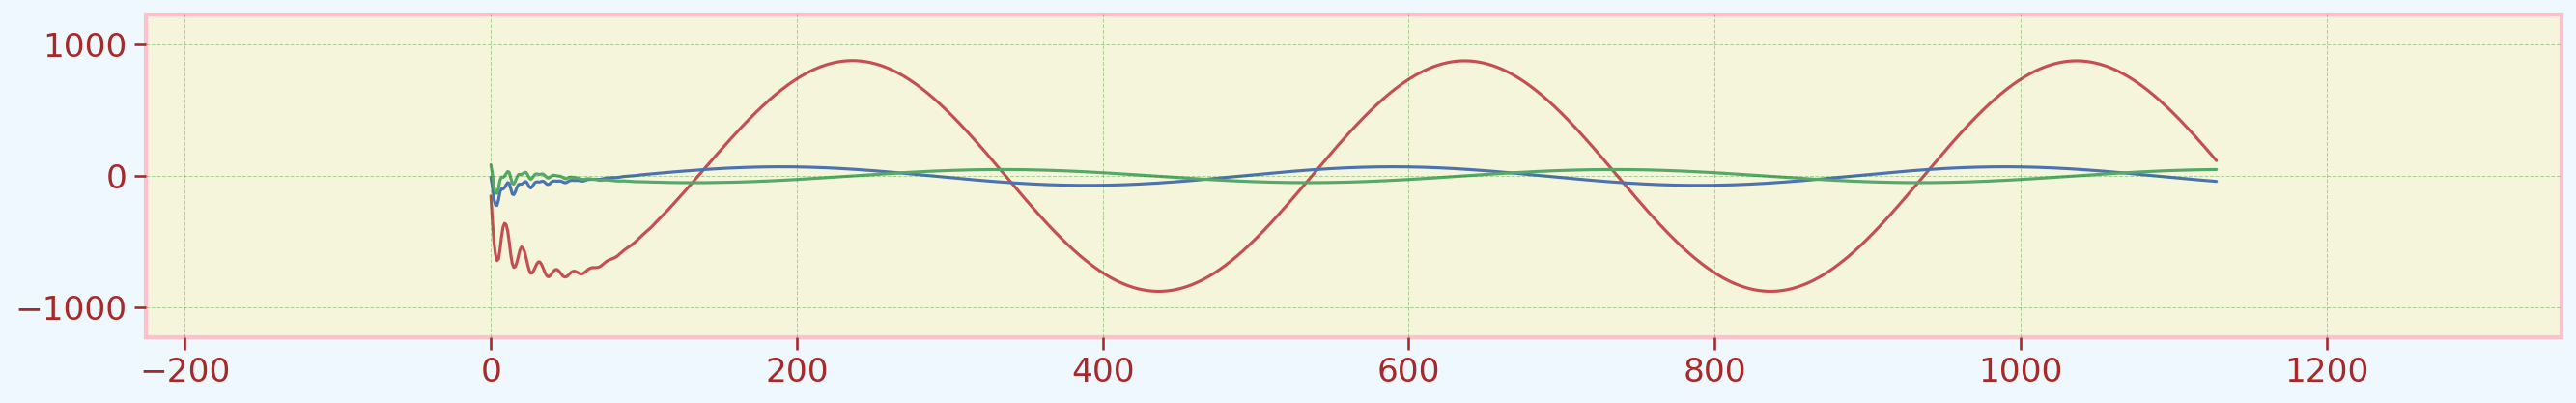

In [ ]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_AG_Fault["Ia"],'r')
ax = plt.plot(Line_AG_Fault["Ib"],'b')
ax = plt.plot(Line_AG_Fault["Ic"],'g');

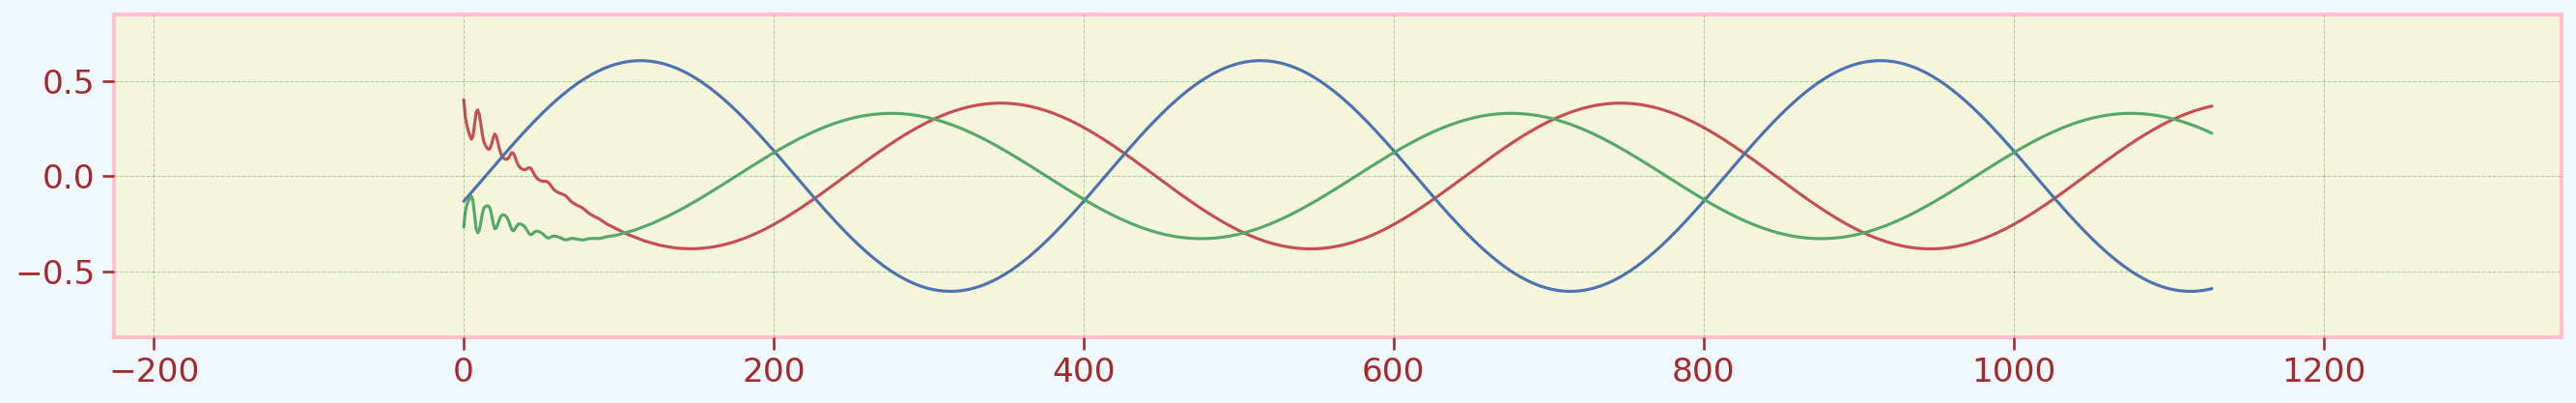

In [ ]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_AG_Fault["Va"],'r')
ax = plt.plot(Line_AG_Fault["Vb"],'b')
ax = plt.plot(Line_AG_Fault["Vc"],'g');

>At a time of Line A to ground fault the current in line A increases to 10 fold approximately 1000 Ampears form normal 100 Ampears and voltage reduced.

## 3. Faulty System with Line A ,Line B to Ground Fault

In [ ]:
Line_ABG_Fault = df_class[df_class['Fault_Type'] == 'Line A Line B to Ground Fault' ]
Line_ABG_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

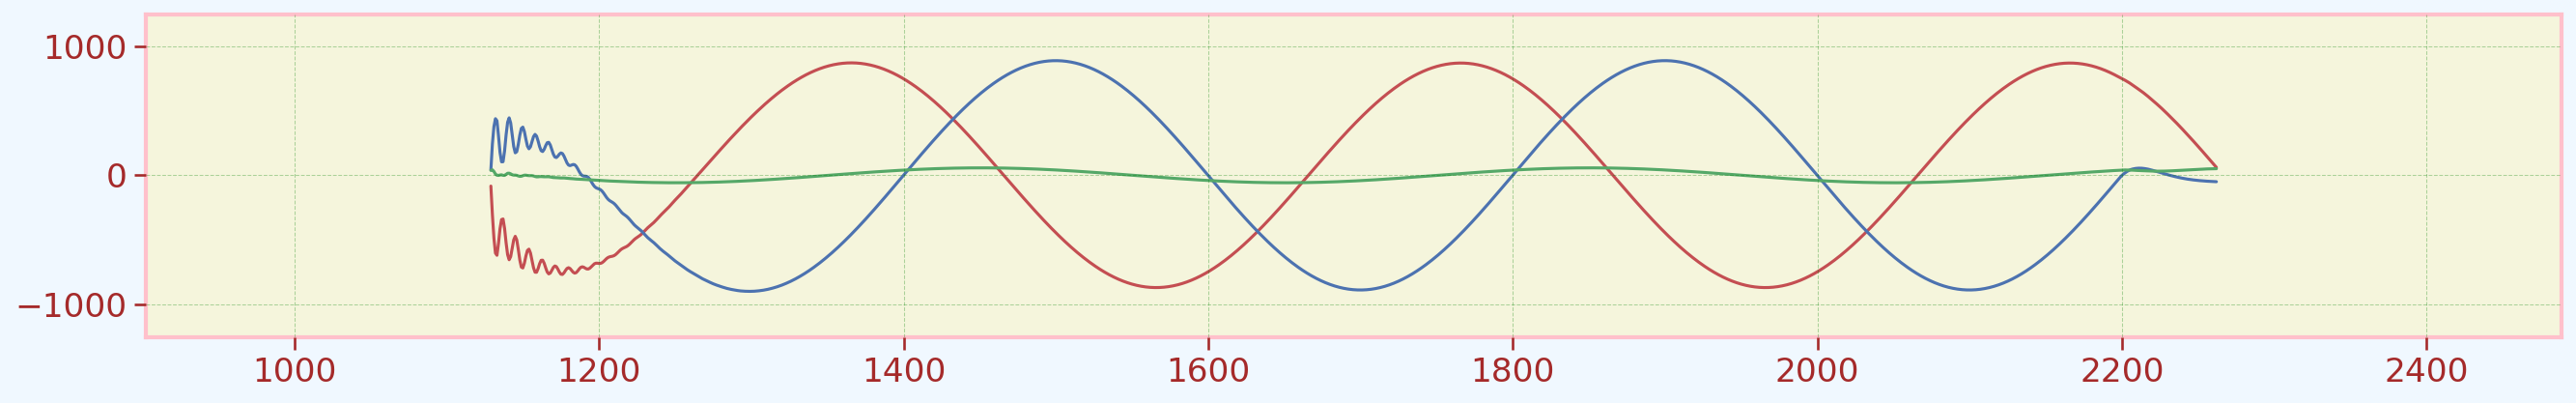

In [ ]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABG_Fault["Ia"],'r')
ax = plt.plot(Line_ABG_Fault["Ib"],'b')
ax = plt.plot(Line_ABG_Fault["Ic"],'g');

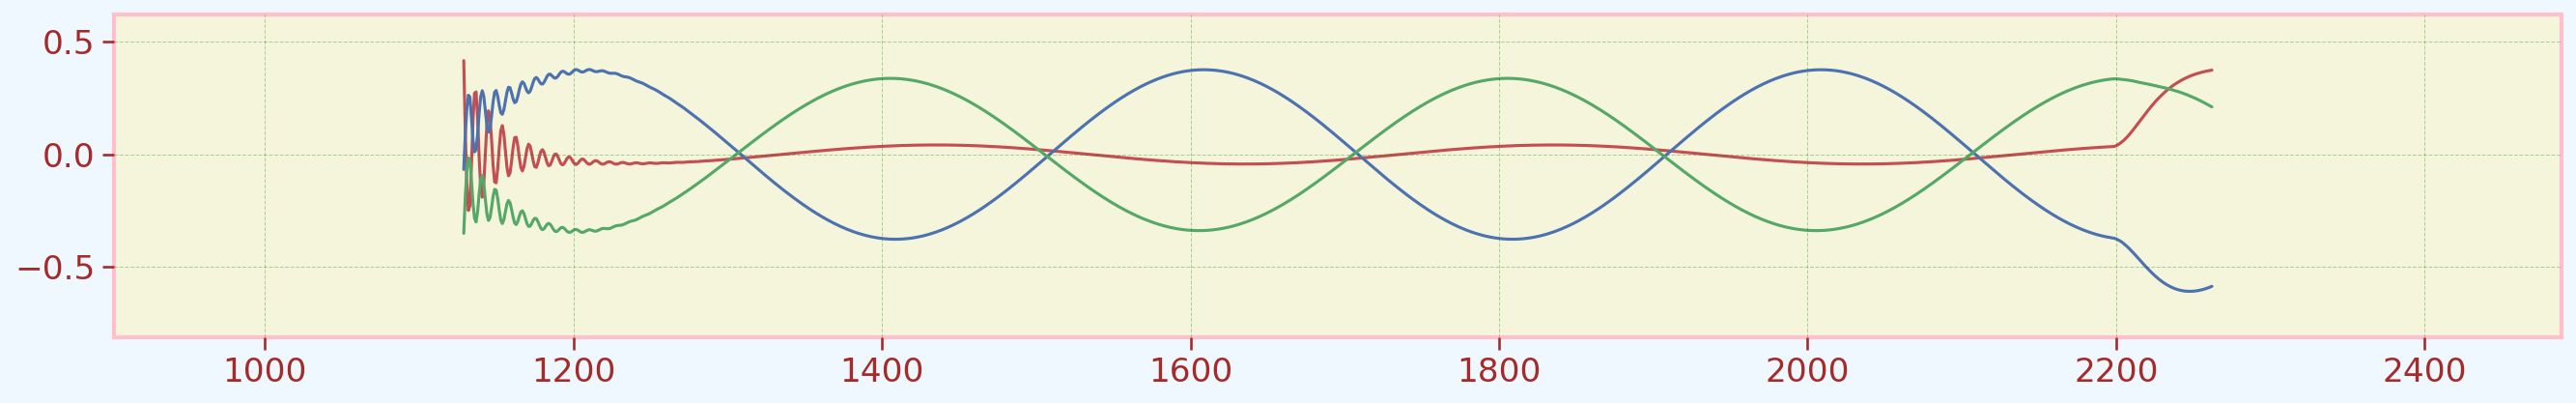

In [ ]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABG_Fault["Va"],'r')
ax = plt.plot(Line_ABG_Fault["Vb"],'b')
ax = plt.plot(Line_ABG_Fault["Vc"],'g');

## 4. Faulty System with Line B to Line C

In [ ]:
Line_BC_Fault = df_class[df_class['Fault_Type'] == 'Line B to Line C Fault' ]
Line_BC_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

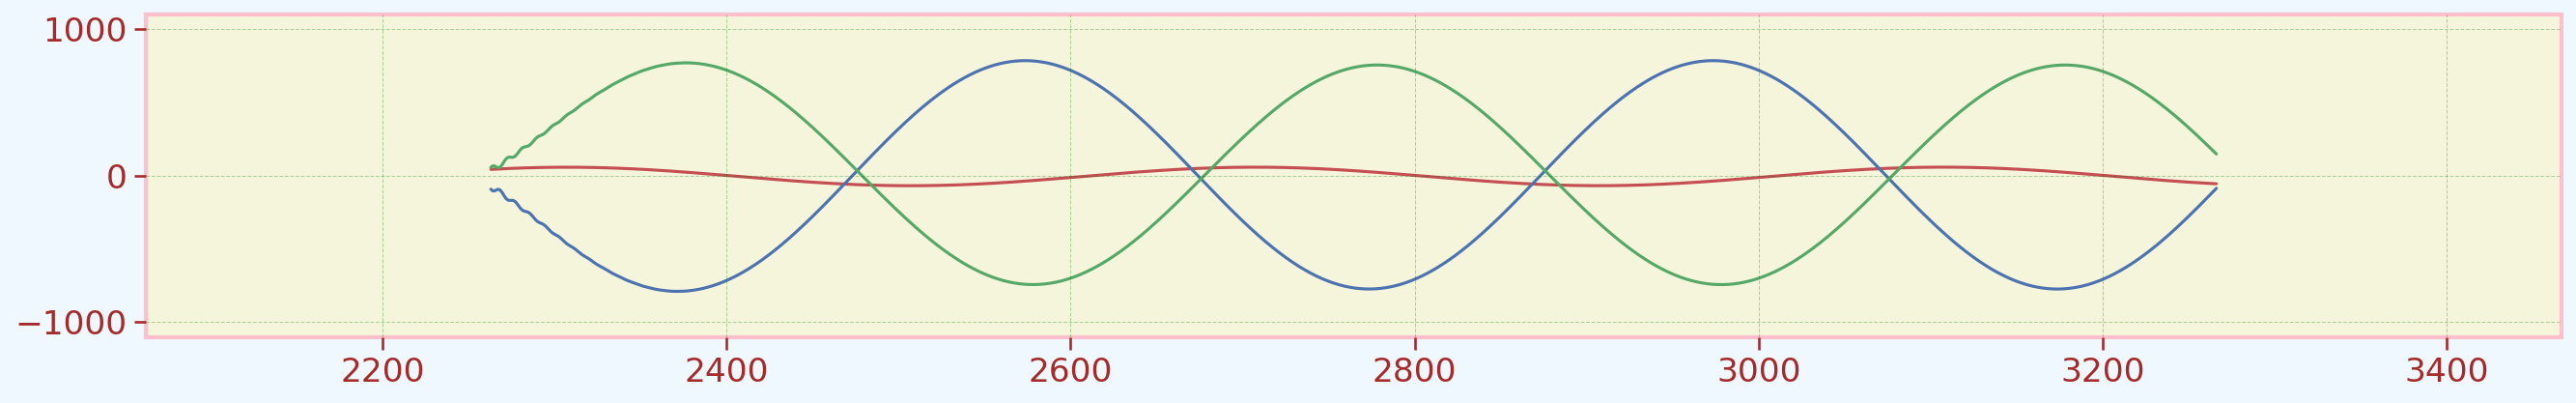

In [ ]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_BC_Fault["Ia"],'r')
ax = plt.plot(Line_BC_Fault["Ib"],'b')
ax = plt.plot(Line_BC_Fault["Ic"],'g');

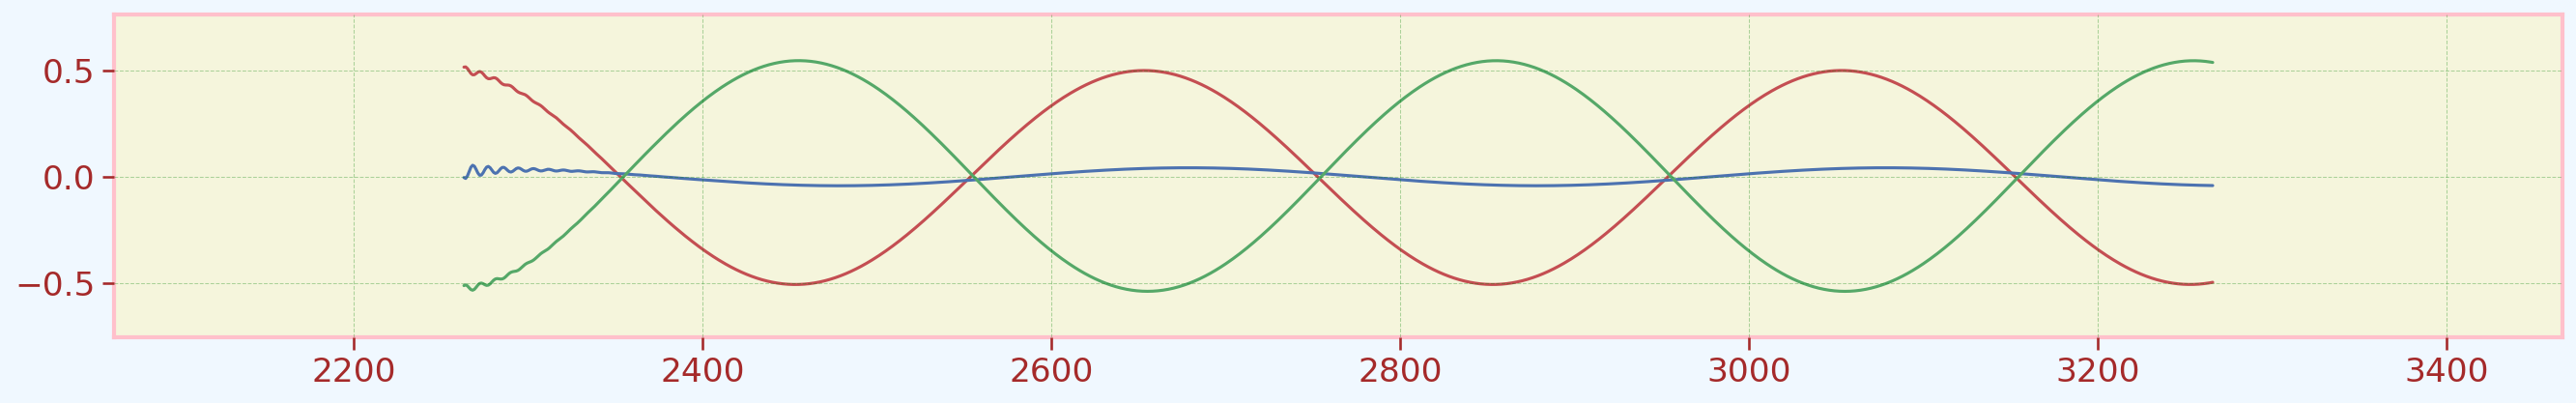

In [ ]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_BC_Fault["Va"],'r')
ax = plt.plot(Line_BC_Fault["Vb"],'b')
ax = plt.plot(Line_BC_Fault["Vc"],'g');

## 5. Faulty System with Line A - Line B - Line C

In [ ]:
Line_ABC_Fault = df_class[df_class['Fault_Type'] == 'Line A Line B Line C' ]
Line_ABC_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

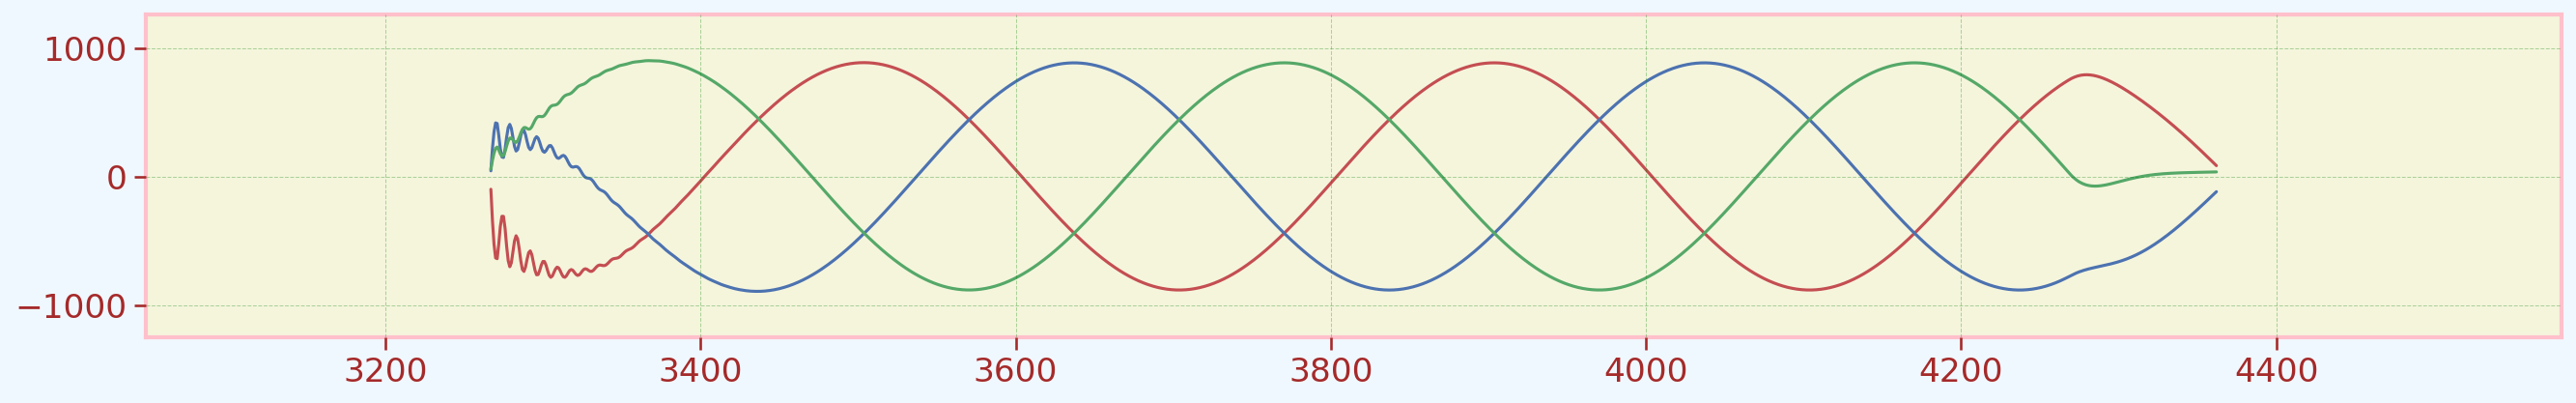

In [ ]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABC_Fault["Ia"],'r')
ax = plt.plot(Line_ABC_Fault["Ib"],'b')
ax = plt.plot(Line_ABC_Fault["Ic"],'g');

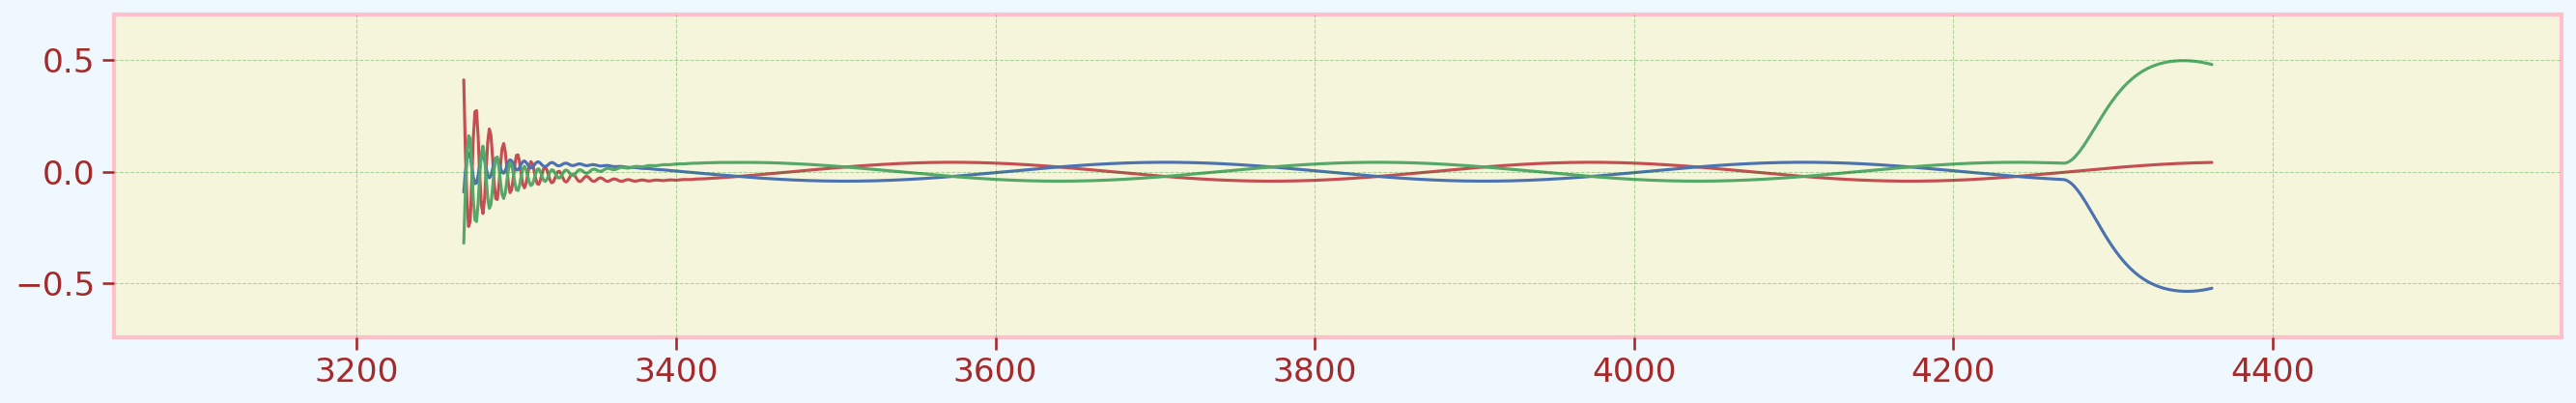

In [ ]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABC_Fault["Va"],'r')
ax = plt.plot(Line_ABC_Fault["Vb"],'b')
ax = plt.plot(Line_ABC_Fault["Vc"],'g');

## 6. Faulty System with Line A - Line B - Line C - Ground

In [ ]:
Line_ABCG_Fault = df_class[df_class['Fault_Type'] == 'Line A Line B Line C to Ground Fault' ]
Line_ABCG_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

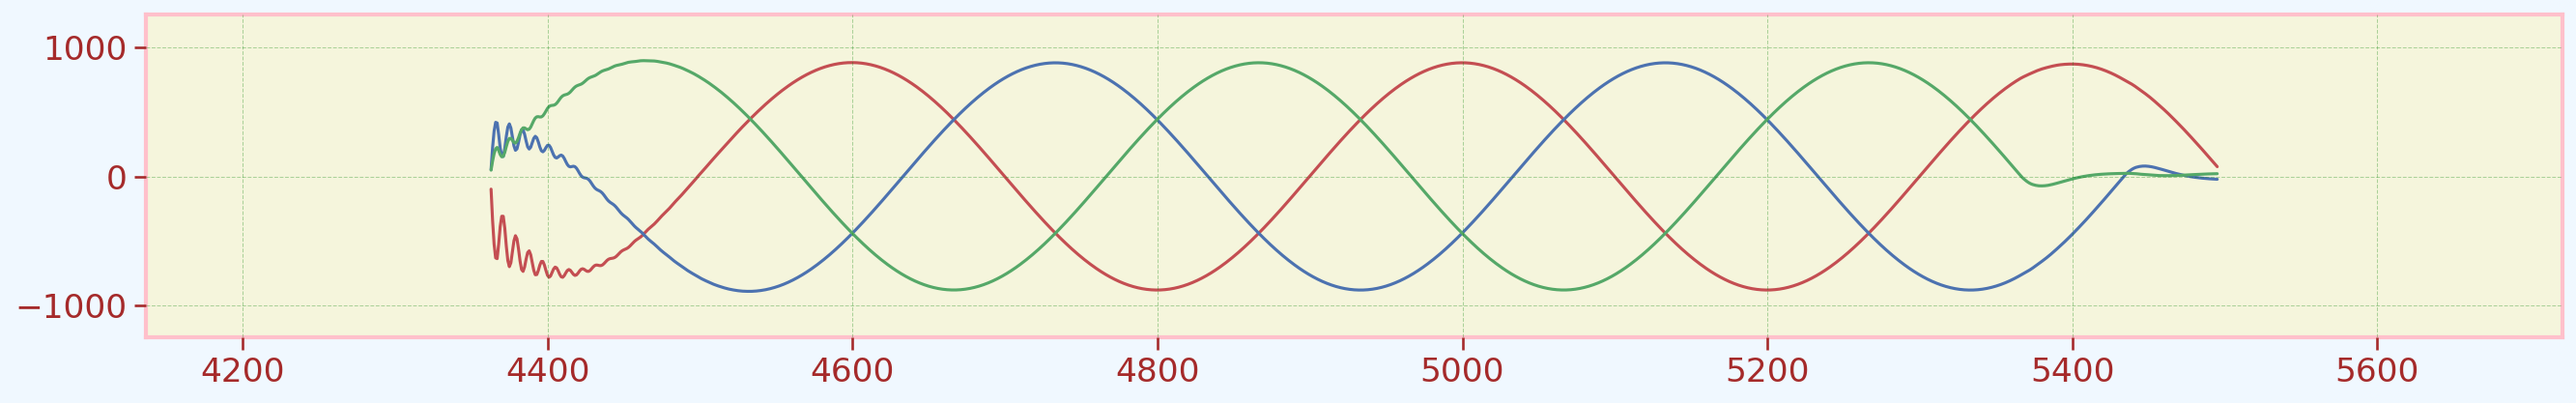

In [ ]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABCG_Fault["Ia"],'r')
ax = plt.plot(Line_ABCG_Fault["Ib"],'b')
ax = plt.plot(Line_ABCG_Fault["Ic"],'g');

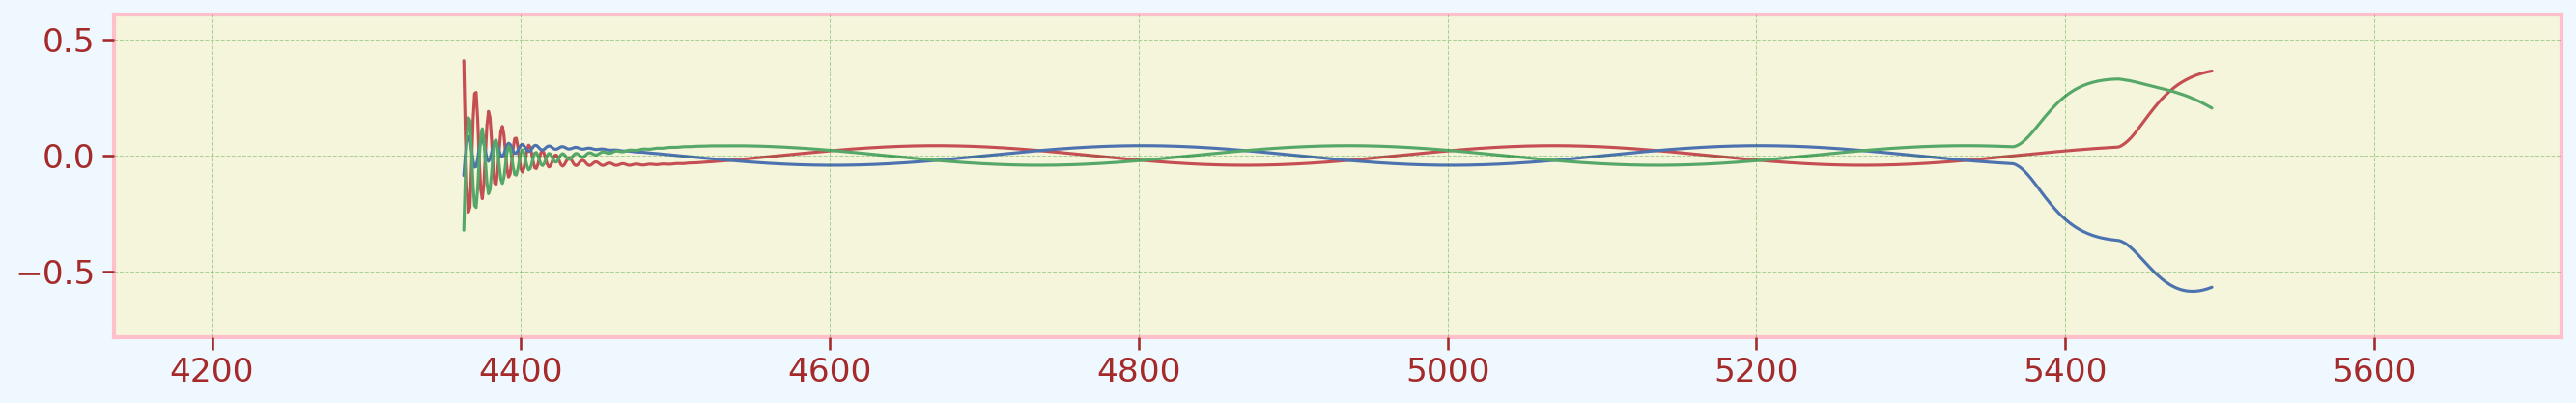

In [ ]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABCG_Fault["Va"],'r')
ax = plt.plot(Line_ABCG_Fault["Vb"],'b')
ax = plt.plot(Line_ABCG_Fault["Vc"],'g');

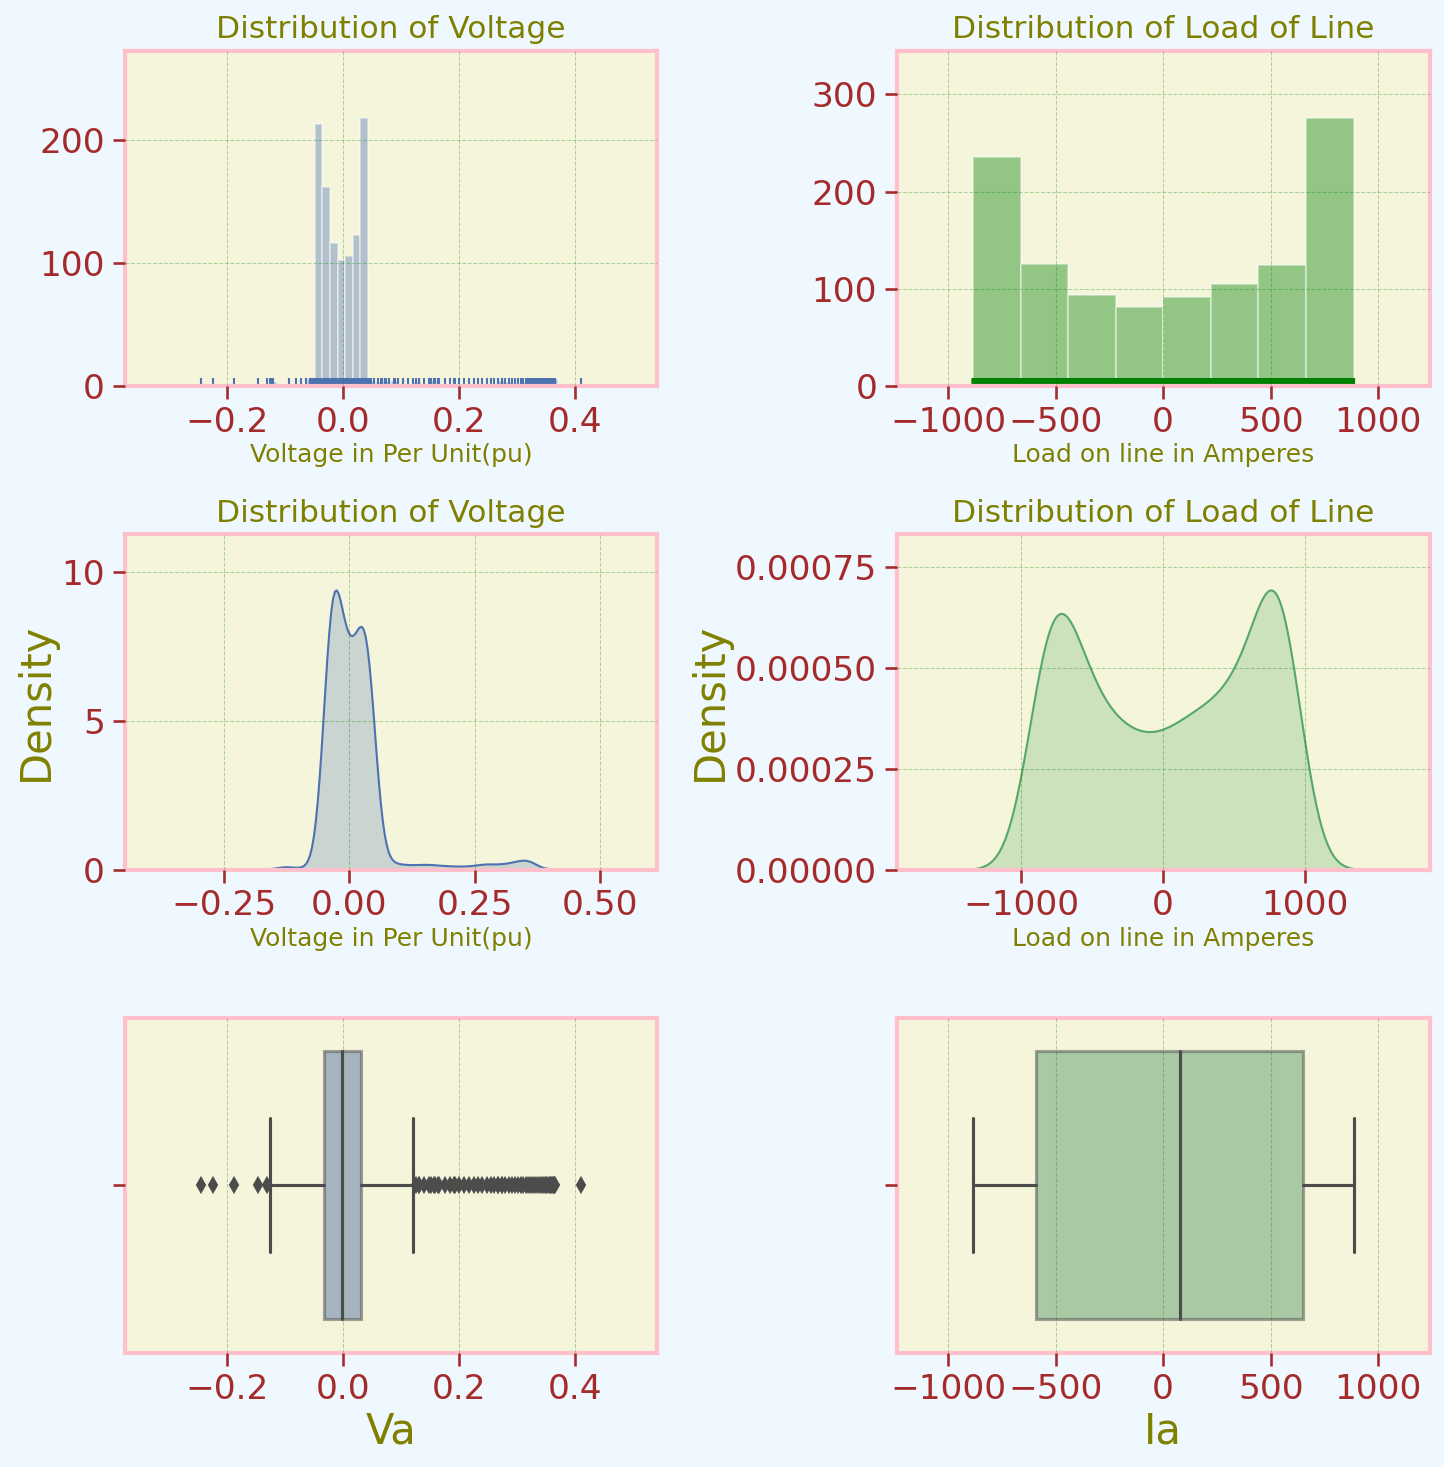

In [ ]:
plt.figure(figsize= (15,10))
#plt.suptitle("Distributions of Different Features", fontsize = 20)
#Histograms
plt.subplot(3,3,1)
sns.distplot(Line_ABCG_Fault['Va'], rug = True, kde = False)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,2)
sns.distplot(Line_ABCG_Fault['Ia'], color= 'green',rug = True, kde = False)
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Kde Plots
plt.subplot(3,3,4)
sns.kdeplot(Line_ABCG_Fault['Va'], shade = True)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,5)
sns.kdeplot(Line_ABCG_Fault['Ia'], shade = True, color = 'g')
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Box Plots
plt.subplot(3,3,7)
sns.boxplot(x = Line_ABCG_Fault['Va'], orient = 'v',color= 'b', boxprops=dict(alpha=.5))
plt.subplot(3,3,8)
sns.boxplot(x = Line_ABCG_Fault['Ia'], orient = 'v', color= 'g', boxprops=dict(alpha=.5))


plt.tight_layout()
plt.show()

# Classification of Fault using Machine Learning

>Feature and Label seperation

*Categorical to Numerical conversion*

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_class['Fault_Type'] = encoder.fit_transform(df_class['Fault_Type'])
df_class.head()

G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0  1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1  1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2  1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3  1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4  1  0  0  1 -643.663617 -224.159427 -132.282815  0.209537 -0.095554   

         Vc  Fault_Type  
0 -0.267815           3  
1 -0.189099           3  
2 -0.151428           3  
3 -0.130570           3  
4 -0.113983           3

## Dependent and Independent Variable Sepration

In [ ]:
X = df_class.drop(['Fault_Type'],axis=1)
y = df_class['Fault_Type']

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)

## Model Selection

1. Logistic Regression

Training Accuracy    : 90.19 %
Model Accuracy Score : 89.57 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.56      1.00      0.72       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      0.17      0.29       198
           5       1.00      1.00      1.00       456

    accuracy                           0.90      1573
   macro avg       0.93      0.86      0.84      1573
weighted avg       0.94      0.90      0.87      1573

--------------------------------------------------------


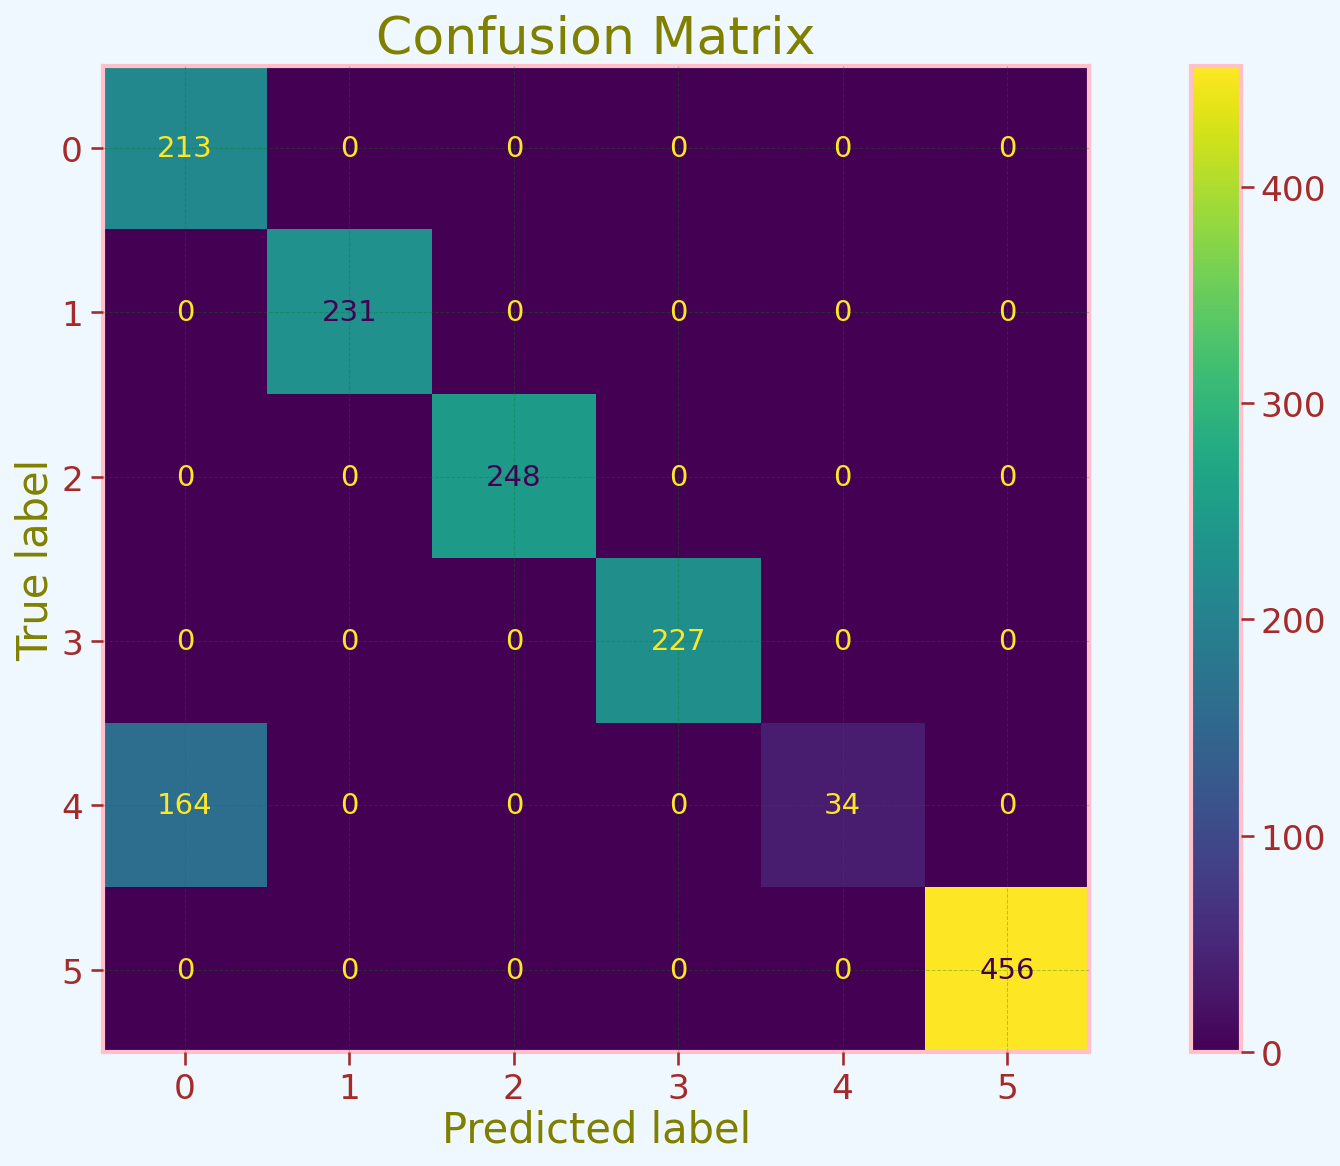

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(logreg, X_test, y_test);
plt.title('Confusion Matrix');

2. Decision Tree Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------


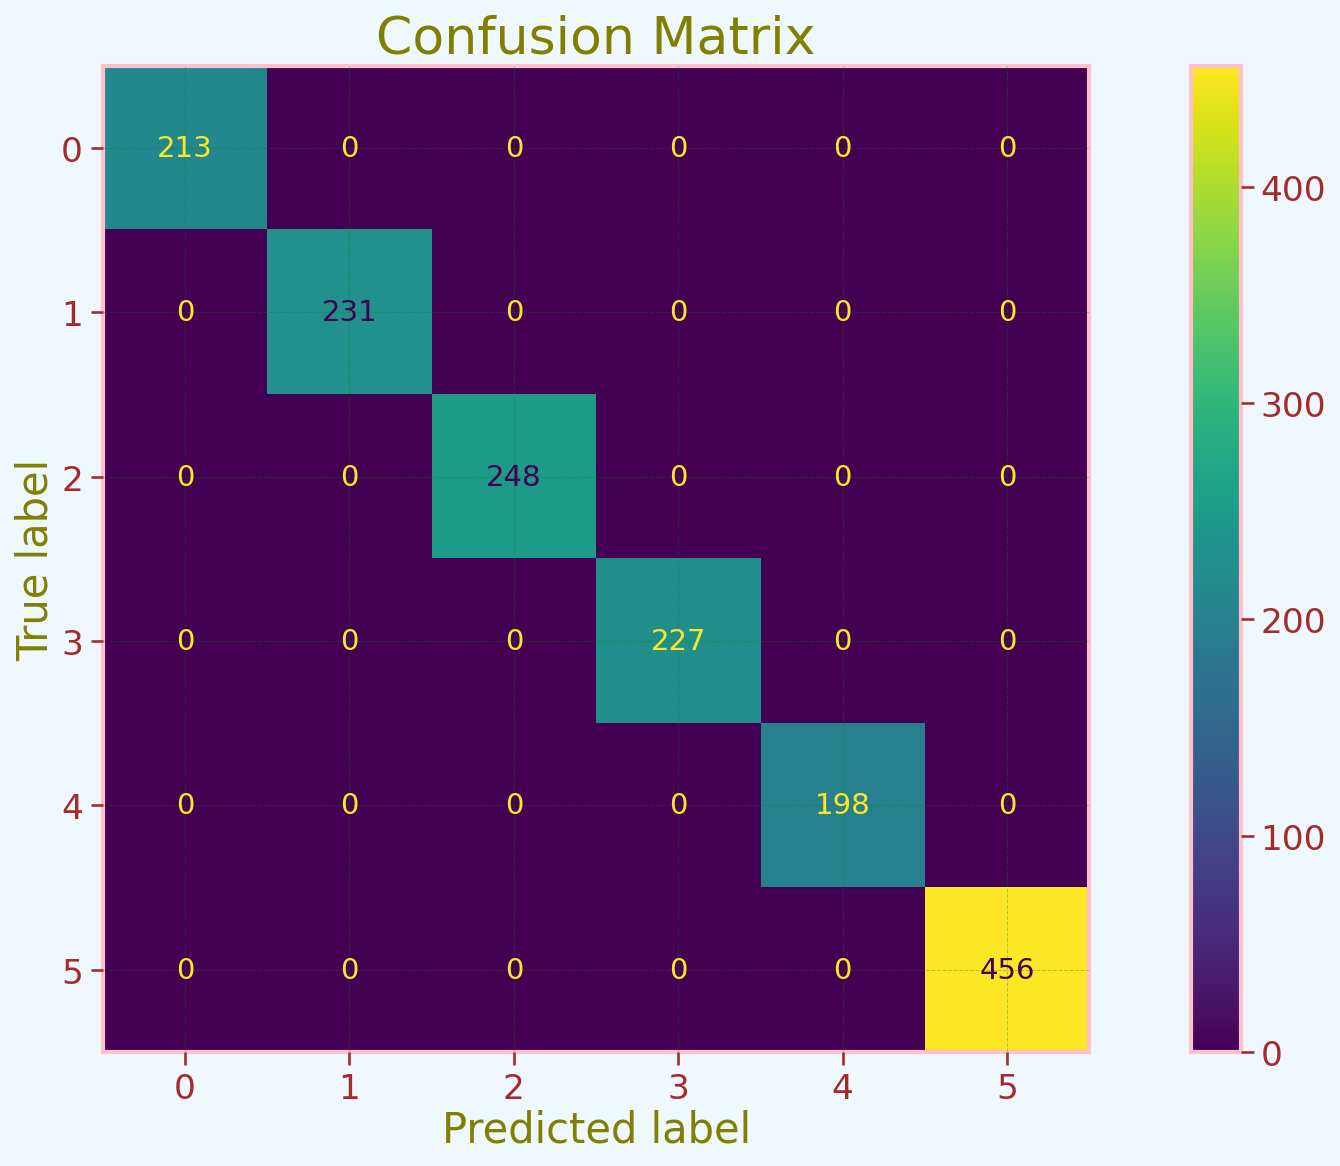

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(decision, X_test, y_test);
plt.title('Confusion Matrix');

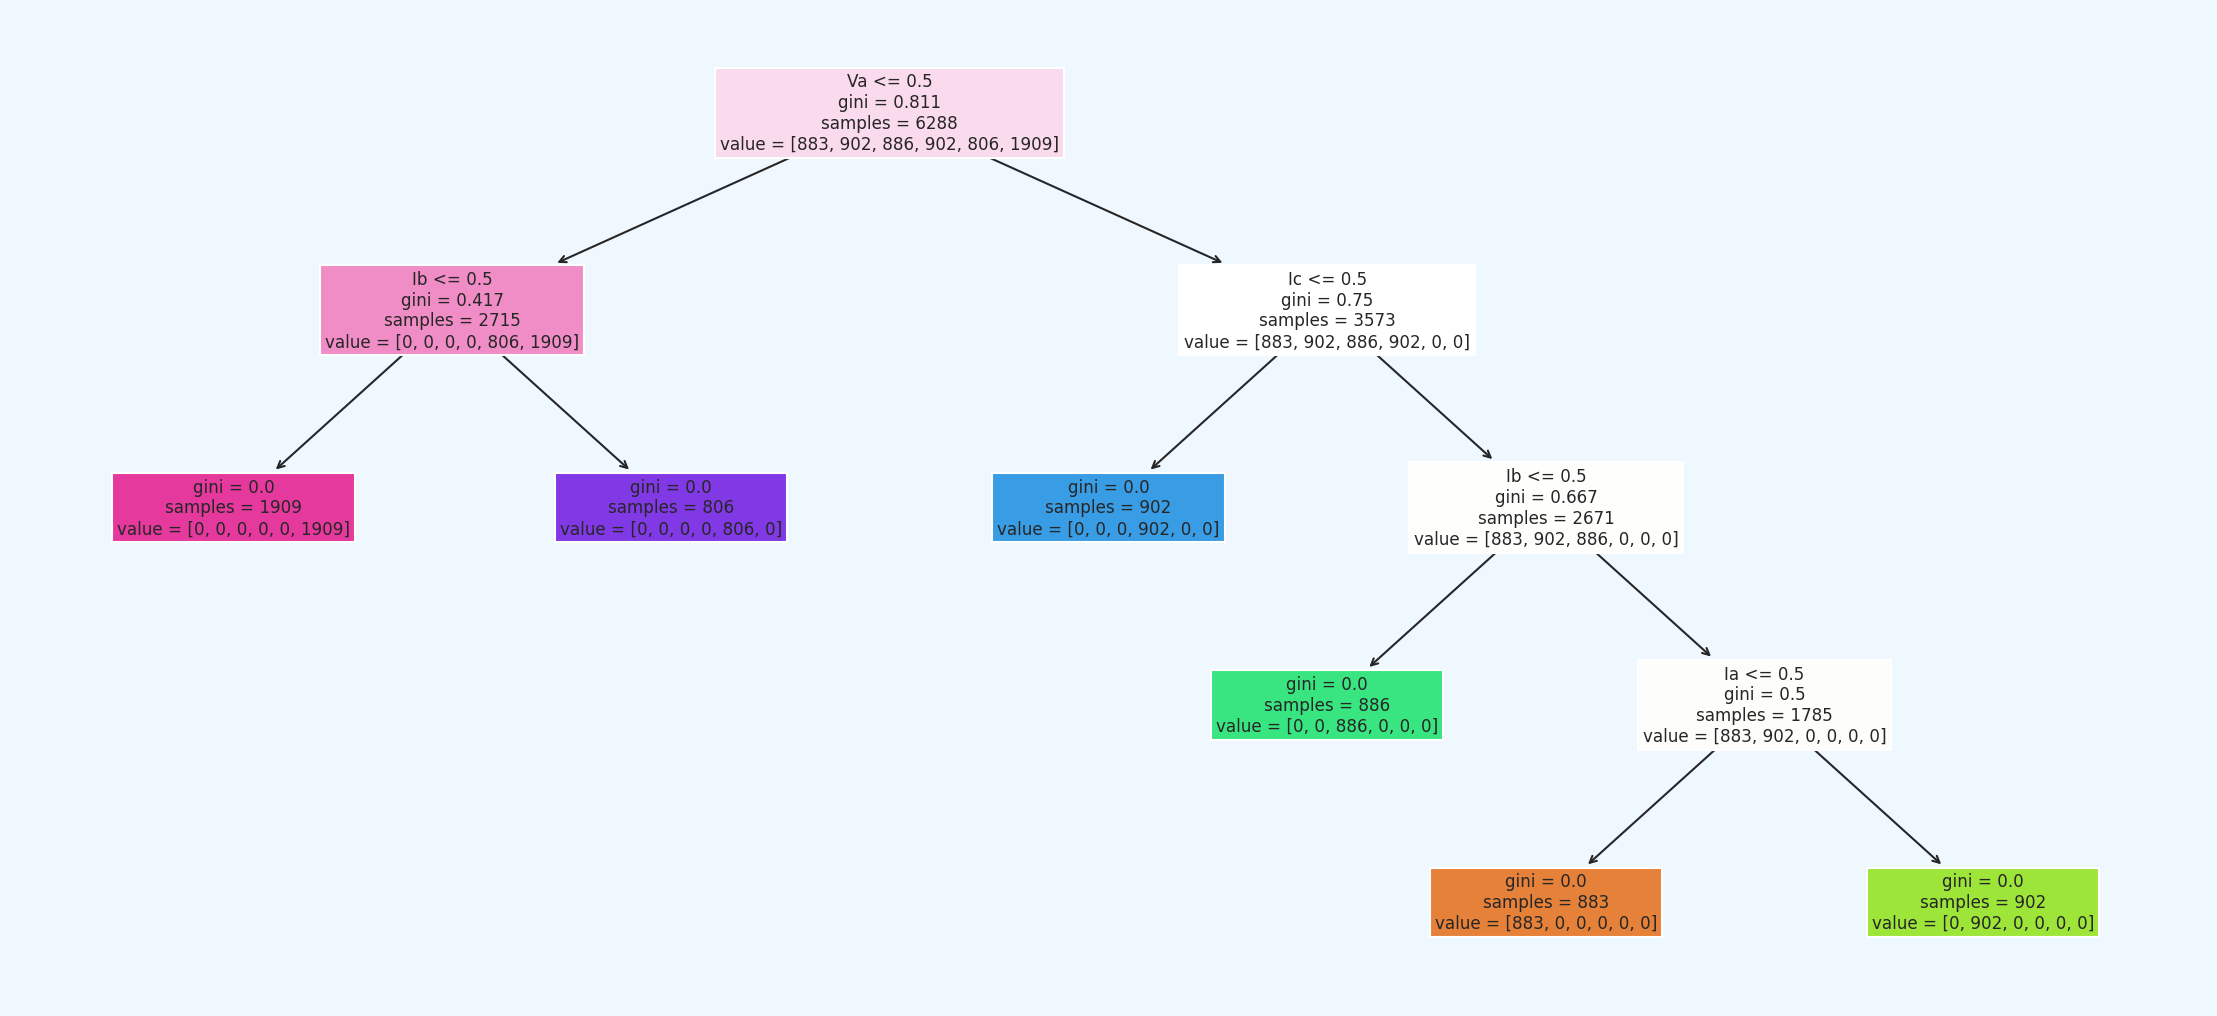

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7))
plot_tree(decision,filled=True,feature_names=['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'])
plt.show()

In [ ]:
from sklearn import tree
def tree_plot(model_name):
    plt.figure(figsize=(20,20))
    features = df_class.columns
    classes = ['NO Fault','Line A to Ground Fault','Line B to Line C Fault','Line A Line B to Ground Fault','Line A Line B Line C','Line A Line B Line C to Ground Fault']
    tree.plot_tree(model_name,feature_names=features,class_names=classes,filled=True)
    plt.show()

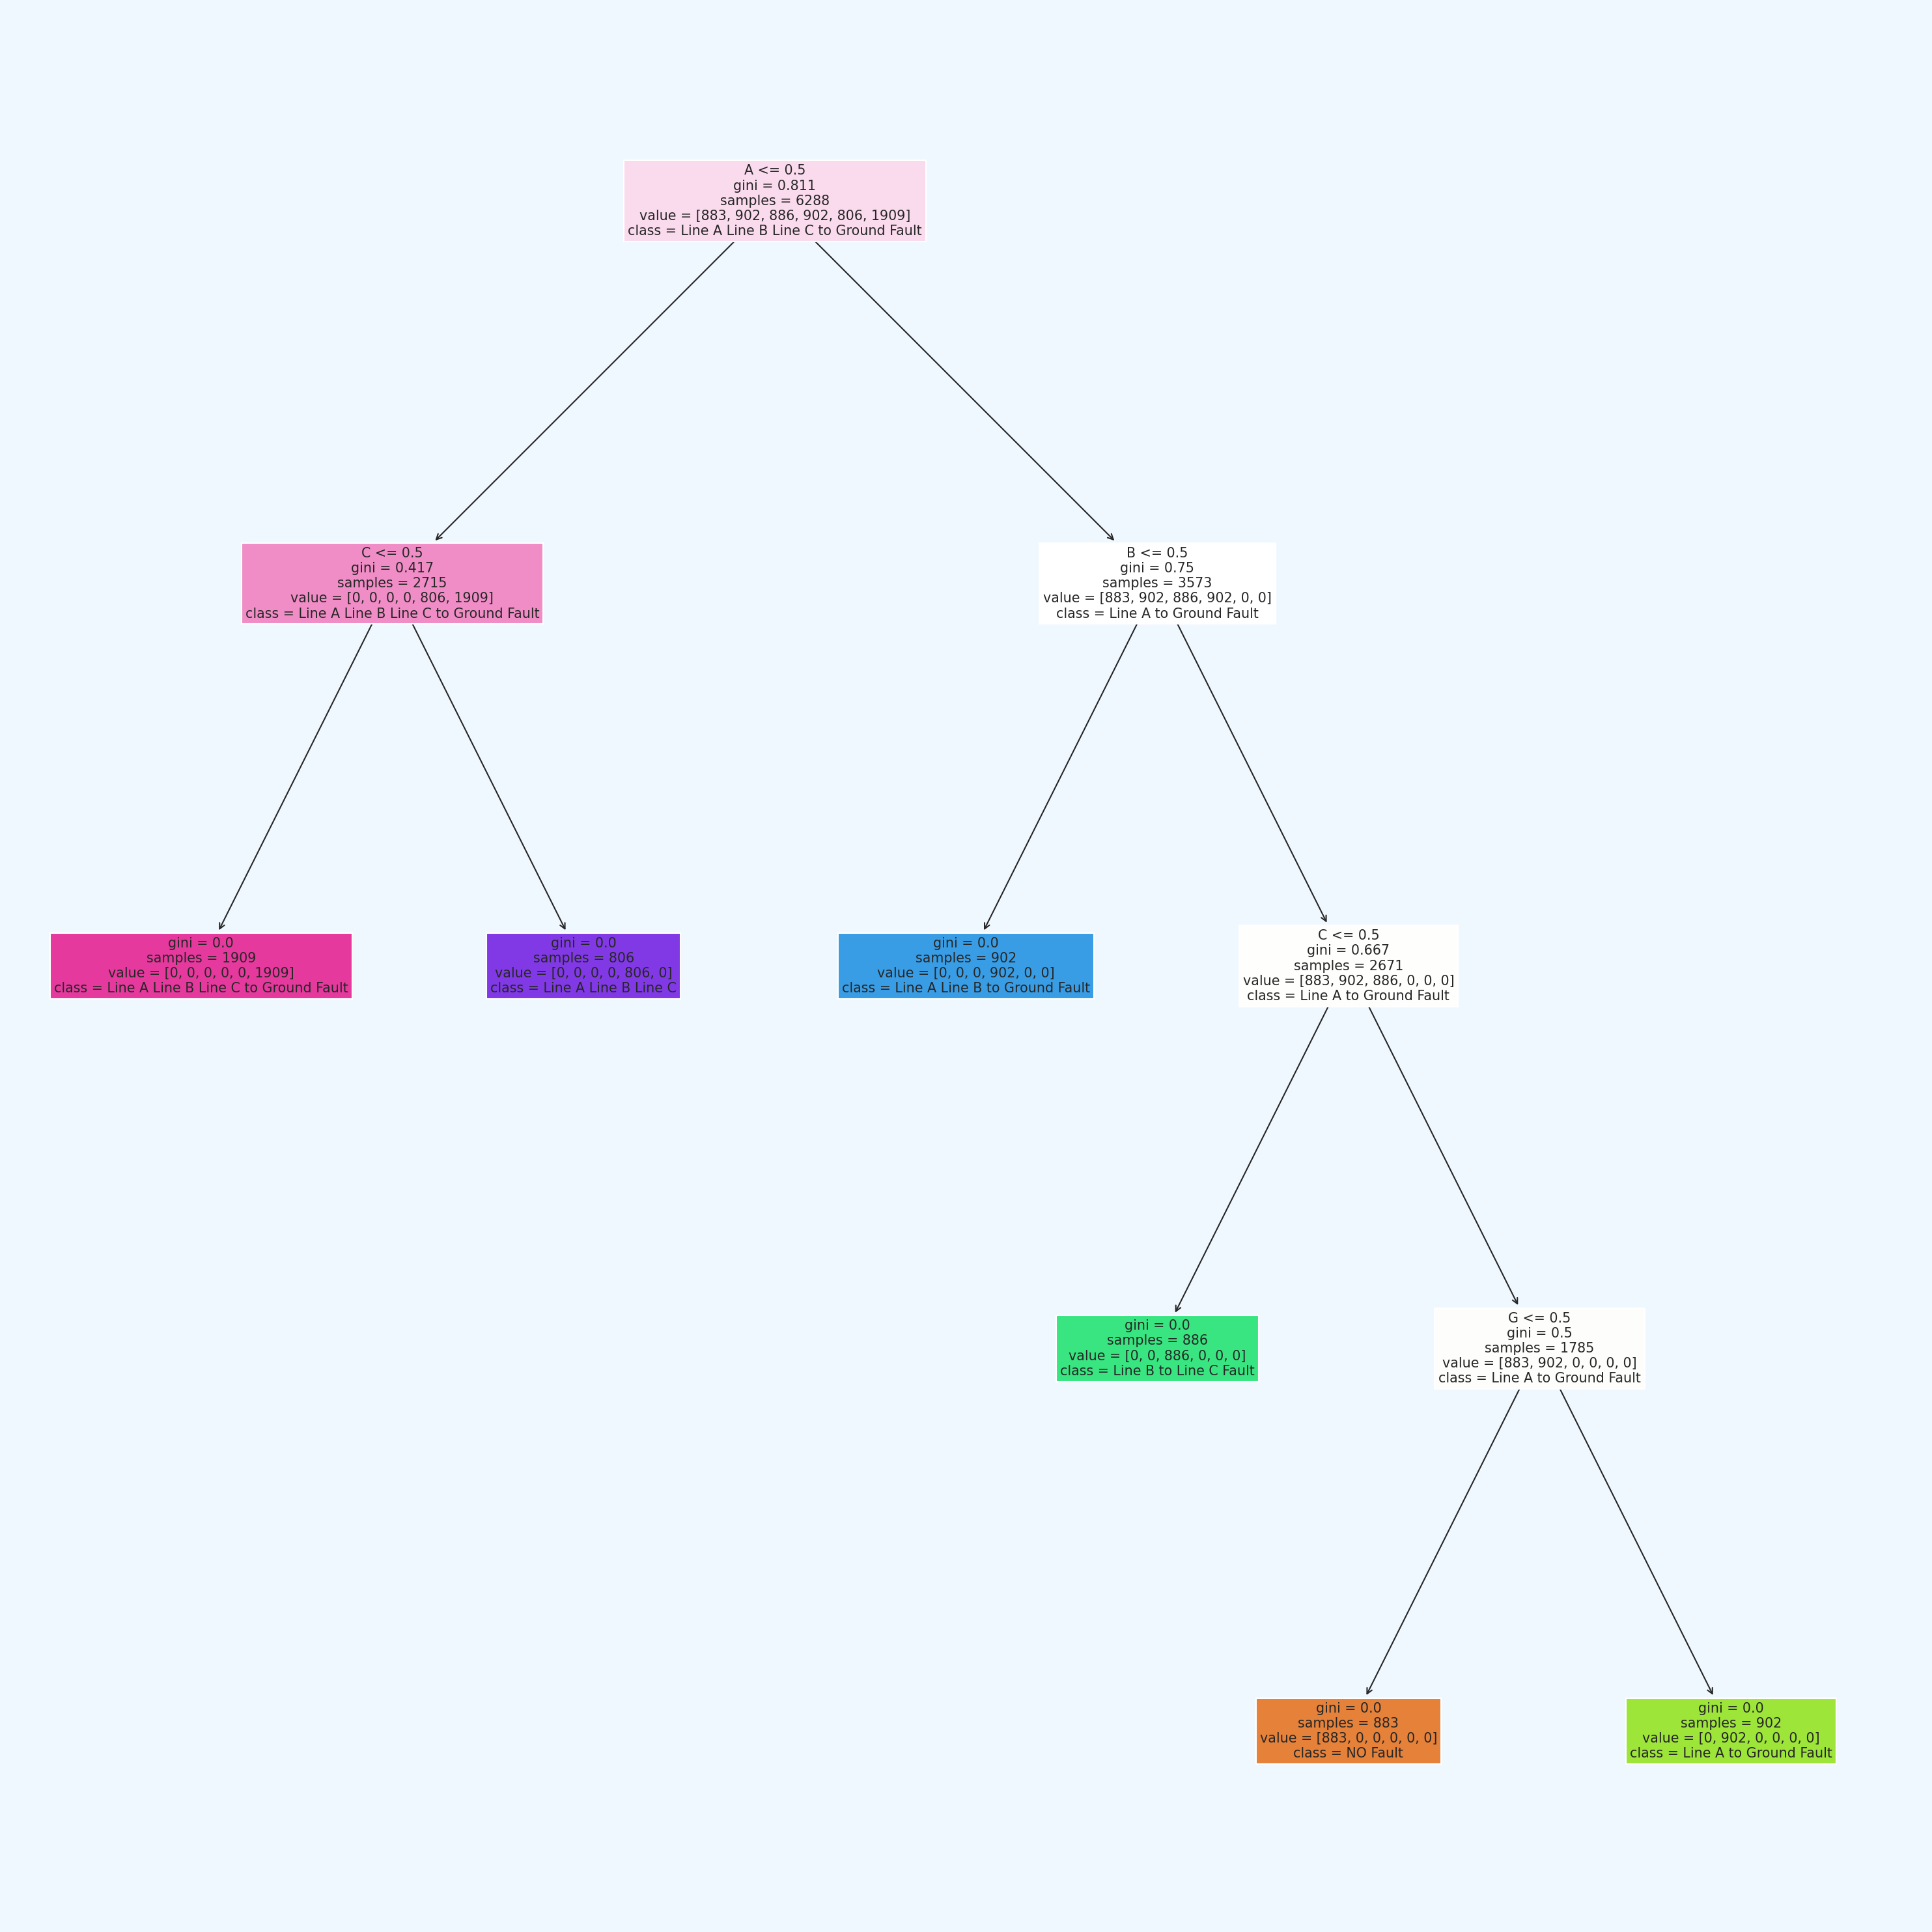

In [ ]:
tree_plot(decision)

3. Random Forest Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------


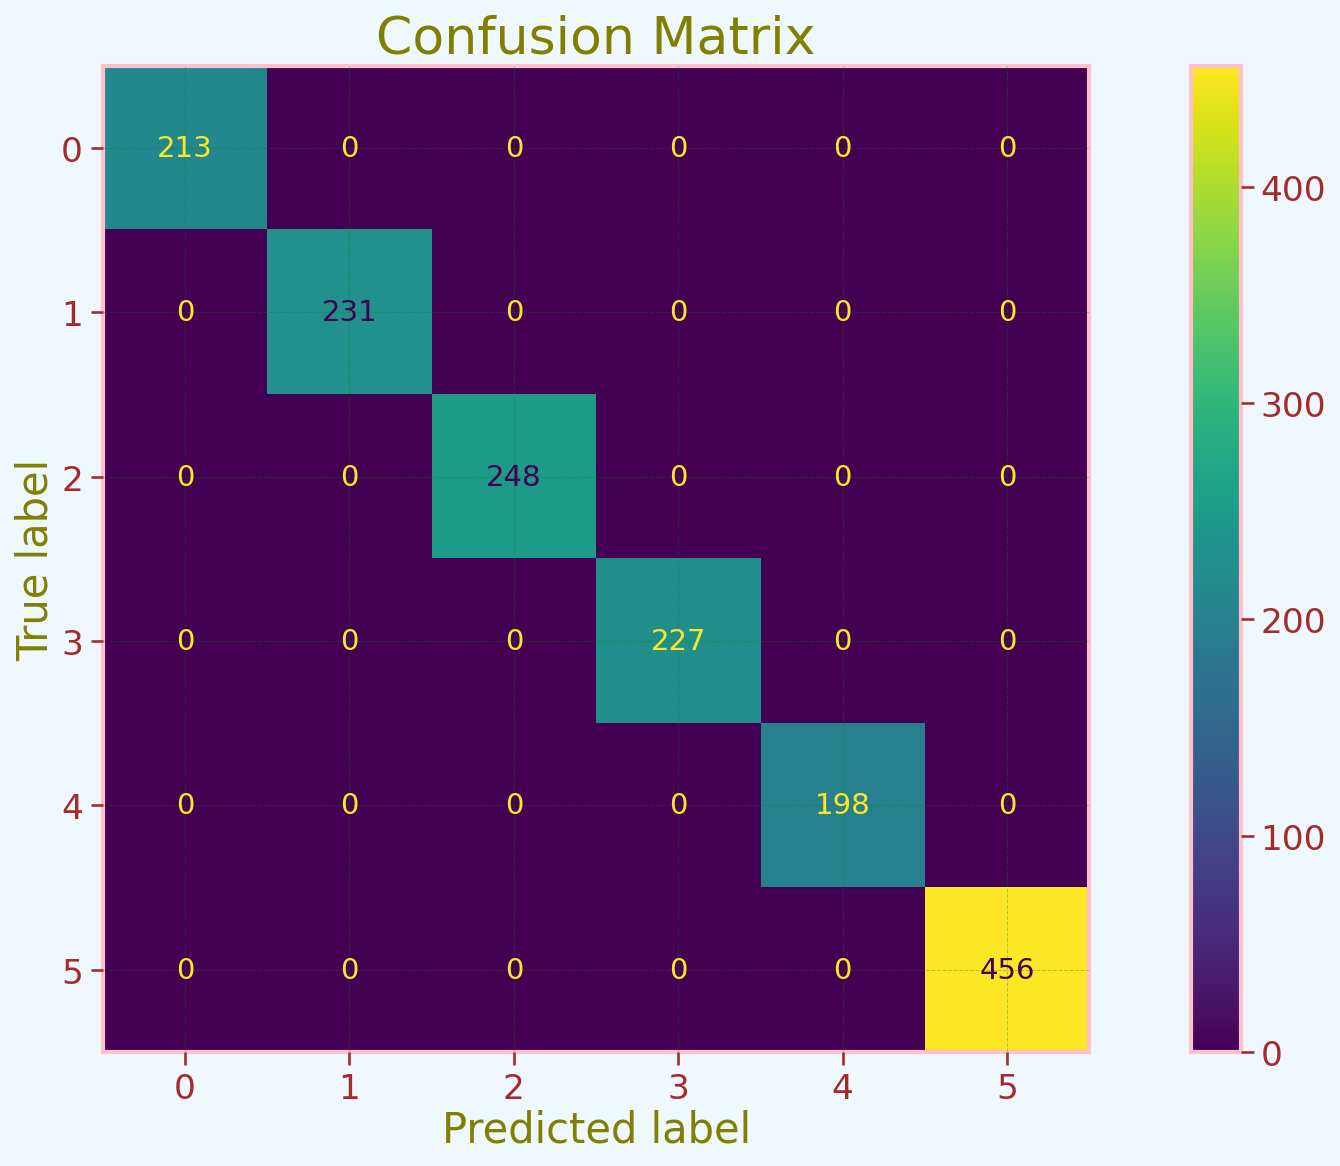

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(random_forest, X_test, y_test);
plt.title('Confusion Matrix');

5. XGB Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------


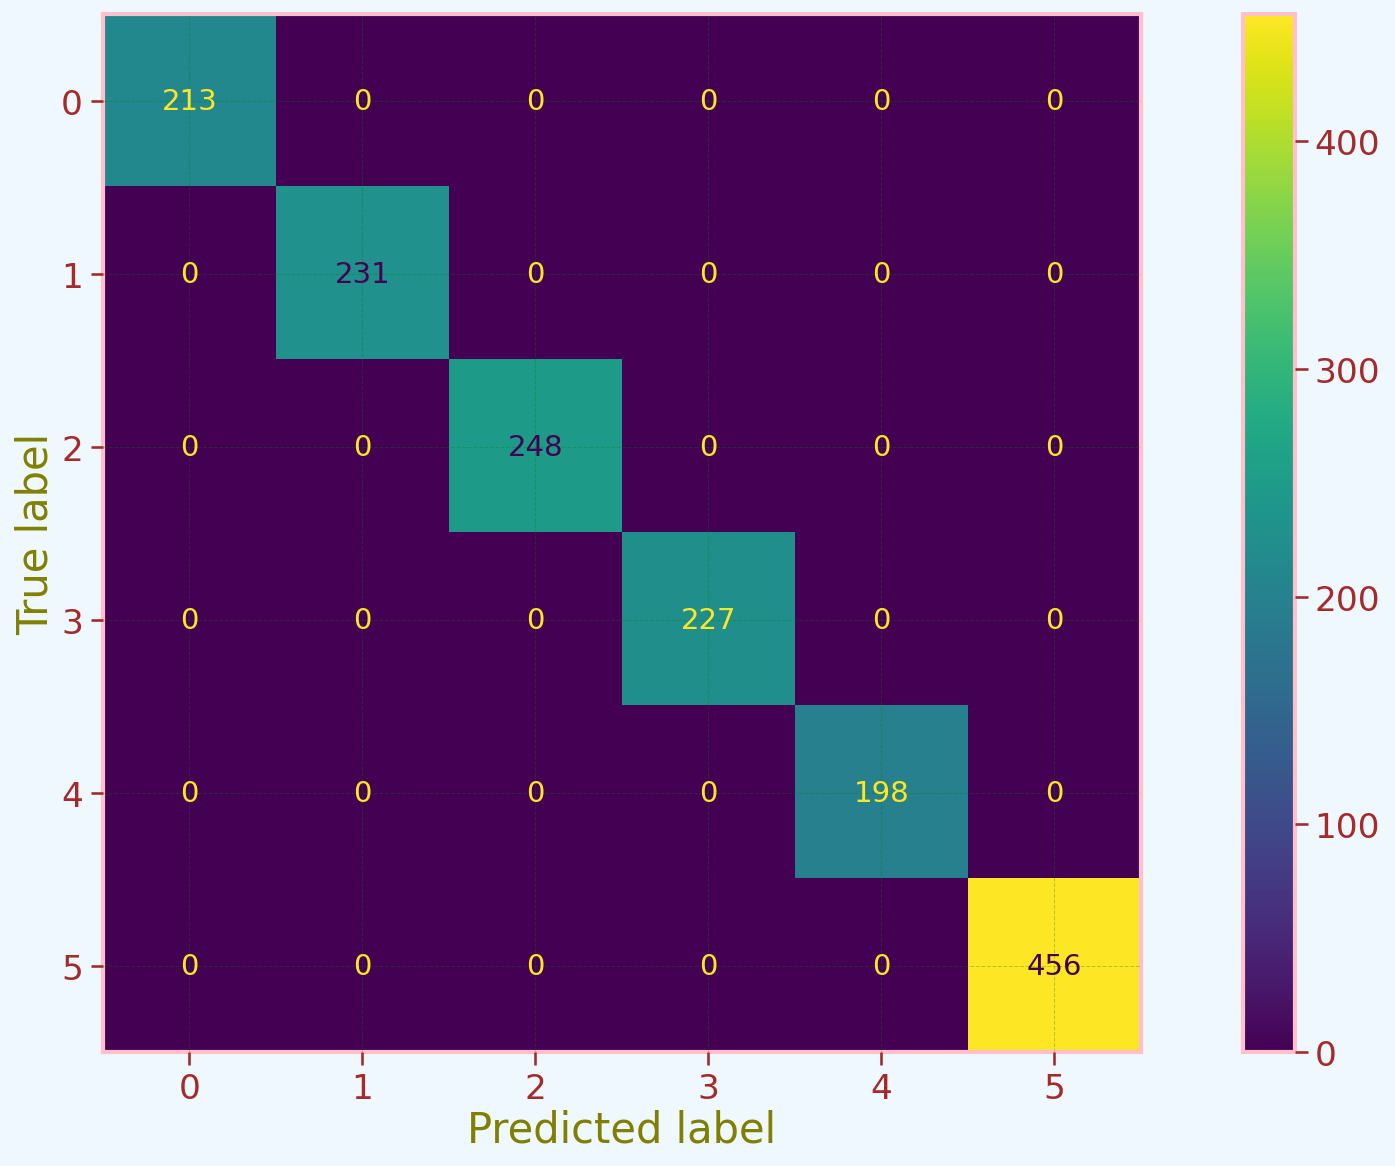

In [ ]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy    :",xgb_train ,"%")
print("Model Accuracy Score :",xgb_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(xgb, X_test, y_test);

6. Support Vector Machines

Training Accuracy    : 76.51 %
Model Accuracy Score : 74.19 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.48      0.35      0.40       213
           1       0.43      0.29      0.35       231
           2       0.75      0.83      0.78       248
           3       0.77      0.86      0.81       227
           4       0.79      0.86      0.82       198
           5       0.87      1.00      0.93       456

    accuracy                           0.74      1573
   macro avg       0.68      0.70      0.68      1573
weighted avg       0.71      0.74      0.72      1573

--------------------------------------------------------


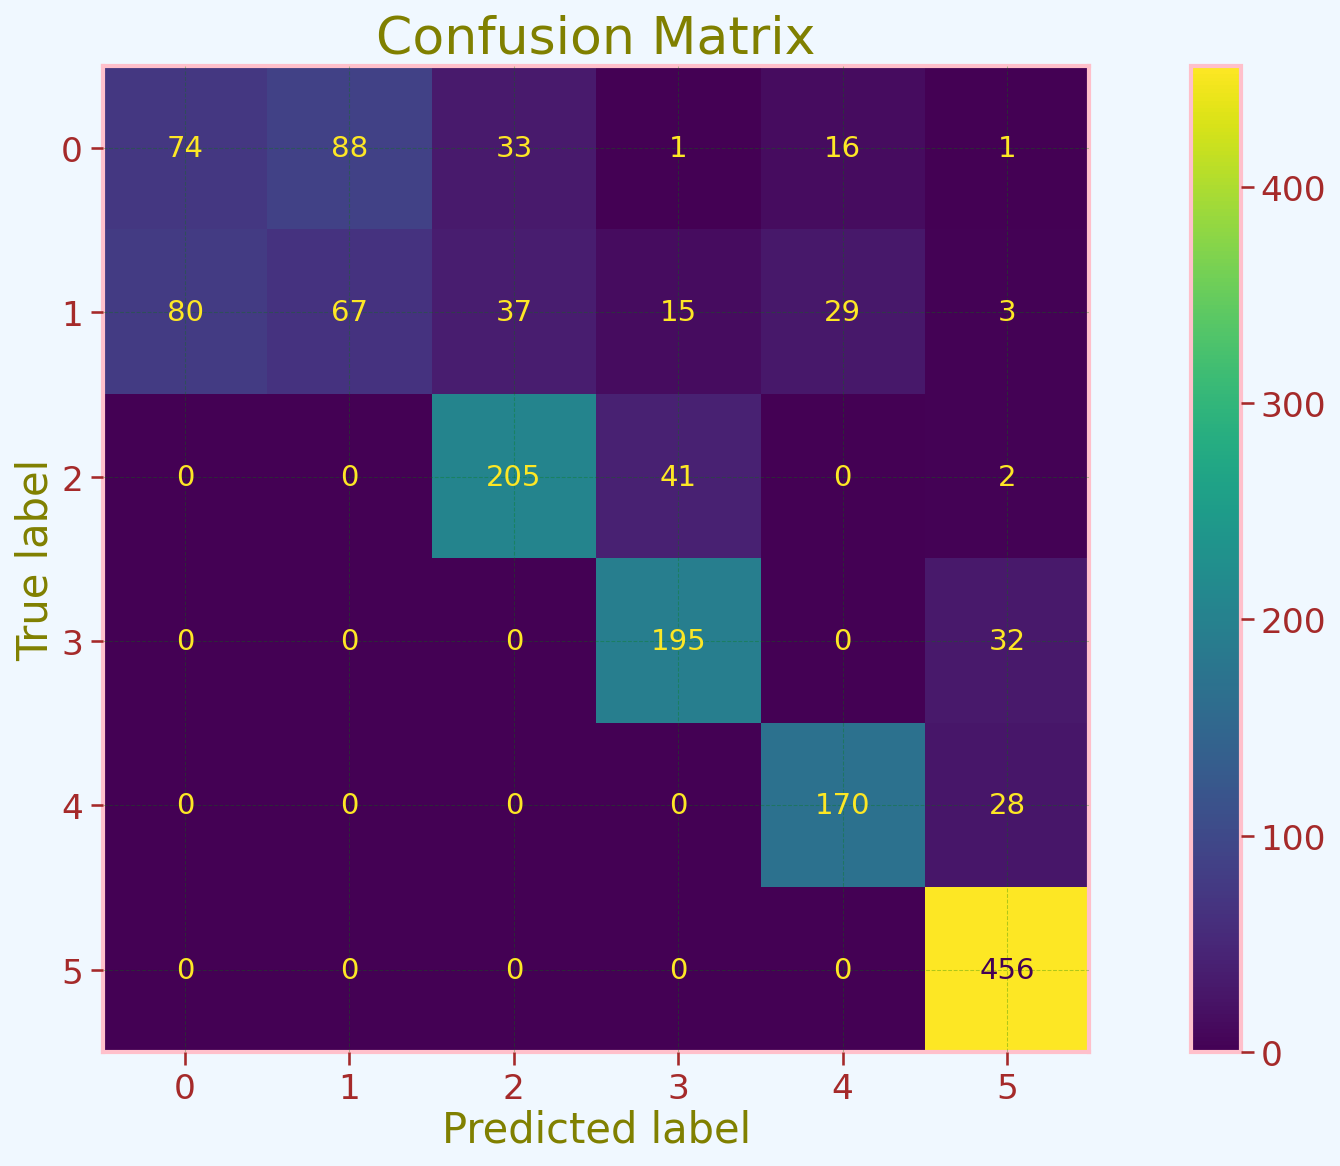

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(svc, X_test, y_test);
plt.title('Confusion Matrix');

## Comparing Different Models

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree', 'XGBClassifier'
    ],
    
    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train, xgb_train],
    
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy,
        xgb_accuracy
    ]
})

In [ ]:
pd.set_option('precision',2)
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

## Result Prediction
1. Random Forest Classifier

In [ ]:
prediction1 = random_forest.predict(X_test)
print(prediction1)

[1 0 0 ... 0 0 5]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

2. Decision Tree Classifier

In [ ]:
prediction2 = decision.predict(X_test)
print(prediction2)

[1 0 0 ... 0 0 5]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction2})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

3. XGB Classifier

In [ ]:
prediction3 = xgb.predict(X_test)
print(prediction3)

[1 0 0 ... 0 0 5]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction3})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

4. Support Vector Machines

In [ ]:
prediction4 = svc.predict(X_test)
print(prediction4)

[0 2 1 ... 0 2 5]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction4})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

5. Logistic Regression

In [ ]:
prediction5 = logreg.predict(X_test)
print(prediction5)

[1 0 0 ... 0 0 5]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction5})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

# Conclusion

Random Forest,Decision Tree Classifier,XGB Classifier, are giving the best Result with 100 percent accuracy and is doing a great job till now in Fault Detection, than the rest of the models because it's able to predict all the signals in most efficient manner while in other models there are cases where there is actually fault but the model is not able to identify it.Logistic Regression is giving the worst accuracy.